#Setup

##Download the required libraries

In [1]:
import sys

print( sys.executable )

!"{sys.executable}" -u -m pip install numpy
!"{sys.executable}" -u -m pip install pandas
!"{sys.executable}" -u -m pip install matplotlib
!"{sys.executable}" -u -m pip install tabulate
!"{sys.executable}" -u -m pip install kneed

/usr/bin/python3


##Import the required libraries

In [2]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
# import seaborn as sns

from IPython.display import HTML, display
import tabulate



## Define Useful Function

In [3]:

#def displayAsTable( lst ) -> None:
#    display(
#        HTML(
#            tabulate.tabulate(lst, tablefmt='html')
#        )
#    )

def displayAsTable( lst ):
    display(
        HTML(
            tabulate.tabulate(lst, tablefmt='html')
        )
    )



## Load the Dataset

These data sets exist in four separate files USDA website only lets us download a maximum number of rows of 50,000 per file.

In [4]:
############################## only for google colab #################################

from google.colab import drive
drive.mount("/content/drive")

######################################################################################

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


#df_1 = pandas.read_csv (r'data/CropYields-1909-1939.csv')
#df_2 = pandas.read_csv (r'data/CropYields-1940-1969.csv')
#df_3 = pandas.read_csv (r'data/CropYields-1970-1989.csv')
#df_4 = pandas.read_csv (r'data/CropYields-1990-2007.csv')

############################## only for google colab #################################
########### Change path according to where you stored the csv files ##################
df_1 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/CropYields-1909-1939.csv')
df_2 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/CropYields-1940-1969.csv')
df_3 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/CropYields-1970-1989.csv')
df_4 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/CropYields-1990-2007.csv')

######################################################################################  
df = pandas.concat([df_1, df_2, df_3, df_4])



# Exploratory Data Analysis


## Global Analysis of the Dataset


In [6]:
df.head()

Program  Year Period  Week Ending  ... Domain Domain Category  Value CV (%)
0  SURVEY  1939   YEAR          NaN  ...  TOTAL   NOT SPECIFIED   11.5    NaN
1  SURVEY  1939   YEAR          NaN  ...  TOTAL   NOT SPECIFIED   10.0    NaN
2  SURVEY  1939   YEAR          NaN  ...  TOTAL   NOT SPECIFIED    5.0    NaN
3  SURVEY  1939   YEAR          NaN  ...  TOTAL   NOT SPECIFIED   14.0    NaN
4  SURVEY  1939   YEAR          NaN  ...  TOTAL   NOT SPECIFIED    8.0    NaN

[5 rows x 21 columns]


We can see that there seems to be meta-data about this data set, as well as some missing data.

We therefore choose to look at the unique values in each column.


In [7]:

for col in df:
    print(col + ": ", df[col].unique())
    print("-------------------------------------------------------------------------------------------")


Program:  ['SURVEY']
-------------------------------------------------------------------------------------------
Year:  [1939 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926
 1925 1924 1923 1922 1921 1920 1919 1918 1909 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951
 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1989 1988 1987
 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973
 1972 1971 1970 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990]
-------------------------------------------------------------------------------------------
Period:  ['YEAR']
-------------------------------------------------------------------------------------------
Week Ending:  [nan]
-------------------------------------------------------------------------------------------
Geo Level:  ['COUNTY']
--------------------------------------------------------------------------------


As can be seen some columns only hold meta-data about this dataset. These columns are are: Program, Period, Geo Level, Commodity, Data Item, Domain, and Domain Category.

We propose to drop them.


In [8]:
df = df.drop(columns=['Program', 'Period', 'Geo Level', 'Commodity', 'Data Item', 'Domain', 'Domain Category'])


Also it is not clear what the CV (%) column is about, and the data within it is all NaN.

Therfore, we also chose to drop this column.


In [9]:
df = df.drop(columns=['CV (%)'])

We also decide to drop the watershed column as it contains NaN values, and will later ind external data and add it to the dataframe. 

We also drop the week ending column as it contains NaN values, and otaining it's information will not help our analysis.  

In [10]:
df = df.drop(columns=['Watershed', 'watershed_code', 'Week Ending'])

We can now start to take a look at each column in more details


## Primary Key




A realy important step in our EDA is the study of what defines a row in our dataset.

The reason that this is so, is that it will help us identify inconsistencies and duplicate values in our dataset.

It will also let us understand what uniquely identifies a row.

Since this dataset is organized by years, the year column is surely part of our primary key.

However, this data is organized by county, that is, we are looking at the yield per year per county.

Therefore, the county and year columns should act as a primary key of our dataset.

All other columns should be "extra information".

So let's find out if the PK (County, Year) is enough.


In [11]:

duplicates = df[ df.duplicated( ["Year", "County"] ) ]
duplicates


Year    State  State ANSI  ... Zip Code  Region Value
65     1939    IDAHO          16  ...      NaN     NaN  30.0
67     1939    IDAHO          16  ...      NaN     NaN  21.3
68     1939    IDAHO          16  ...      NaN     NaN  32.8
88     1939    IDAHO          16  ...      NaN     NaN  29.3
92     1939    IDAHO          16  ...      NaN     NaN  17.1
...     ...      ...         ...  ...      ...     ...   ...
36795  1990  WYOMING          56  ...      NaN     NaN  56.7
36796  1990  WYOMING          56  ...      NaN     NaN  65.7
36798  1990  WYOMING          56  ...      NaN     NaN  25.3
36804  1990  WYOMING          56  ...      NaN     NaN  26.9
36805  1990  WYOMING          56  ...      NaN     NaN  25.0

[56468 rows x 10 columns]


It seems like the county and year column does not identify uniquely a row, since the result of the previous operation does not produce an empty dataframe.

Let us find out why.


In [12]:

x = duplicates[ duplicates["County"] == "CUSTER" ]
x = x[ x["Year"] == 1939 ]
x


Year         State  State ANSI  ... Zip Code  Region Value
65   1939         IDAHO          16  ...      NaN     NaN  30.0
666  1939       MONTANA          30  ...      NaN     NaN   9.6
886  1939      OKLAHOMA          40  ...      NaN     NaN  14.8
981  1939  SOUTH DAKOTA          46  ...      NaN     NaN   5.3

[4 rows x 10 columns]


It seems like it is possible to have counties with the same name in different states.

We therefore, choose to add the state column to our PK.



In [13]:

duplicates = df[ df.duplicated( ["Year", "State", "County"] ) ]
duplicates


Year          State  State ANSI  ... Zip Code  Region Value
3144   1937       VIRGINIA          51  ...      NaN     NaN  20.0
4176   1936       VIRGINIA          51  ...      NaN     NaN  17.5
5203   1935       VIRGINIA          51  ...      NaN     NaN  20.0
6315   1934       VIRGINIA          51  ...      NaN     NaN  20.0
7404   1933       VIRGINIA          51  ...      NaN     NaN  20.0
...     ...            ...         ...  ...      ...     ...   ...
36659  1990       VIRGINIA          51  ...      NaN     NaN  42.0
36661  1990       VIRGINIA          51  ...      NaN     NaN  40.1
36664  1990       VIRGINIA          51  ...      NaN     NaN  50.0
36688  1990     WASHINGTON          53  ...      NaN     NaN  51.7
36719  1990  WEST VIRGINIA          54  ...      NaN     NaN  30.0

[3203 rows x 10 columns]


It seems like within a state, and within a year, there are aggregated counties that are called "OTHER (COMBINED) COUNTIES".

They have a County ANSI of NaN, and can therefore not be identified.

However, those records do seem to have a Yield value.

However, the Ag District column also has a value which does not seem to correspond with our understanding of Agricultural District.

If we cannot know the name of a county, then we cannot know the agricultural districts they contain.

These columns are not numerous at a number of 3201 rows.

We could therefore, choose to keep them or not while not affect the data.

We could also choose to remove them, and this would not affect the dataset at all, as we would be removing all instances of such counties.

Below we will verify what happens if we remove them.


In [14]:

duplicates = df[ df["County"] != "OTHER (COMBINED) COUNTIES" ]
duplicates = duplicates[ duplicates.duplicated( ["Year", "State", "County"] ) ]
duplicates


Empty DataFrame
Columns: [Year, State, State ANSI, Ag District, Ag District Code, County, County ANSI, Zip Code, Region, Value]
Index: []


As we can see, we can identify <Year, State, County> as a unique identifier of a row in our dataset.



## Analysis of Individual Columns



### The Year Column


In [15]:
years = df["Year"]

unique = numpy.sort(years.unique())

min_year = unique[0]
max_year = unique[len(unique) - 1]


print( f"The number of years between {min_year} and {max_year} is: {max_year - min_year}" )
print( f"The number of years recorded in the dataset is: {len(unique)}" )


The number of years between 1909 and 2007 is: 98
The number of years recorded in the dataset is: 91


As we can see, there seems to be 7 years missing in the dataset.

We would like to see which stretches of time correspond to this missing data.

In [16]:

table = []
for i in range( len(unique) - 1 ):
    if unique[i+1] - unique[i] > 1:
        table.append( [f"{unique[i] + 1}-{unique[i+1]-1}", (unique[i+1] - 1) - (unique[i] + 1)] )

print("The missing years are:")
displayAsTable(table)


The missing years are:


We can therefore confirm that that all of the missing years occur between 1909 and 1918.

We can also notice that all of the missing years occur at the beginning of the records, with only one year (1909) preceding them.

Futhuremore, these missing dates are quite old.

Therefore, we can assume that removing the 1909 date from the record is safe, and that it will not affect the trends observed.

In this way we will have a continuous stretch of time.

However, for now we will keep it as we could maybe make use of it later.

We would now like to see how many records exists for each year.

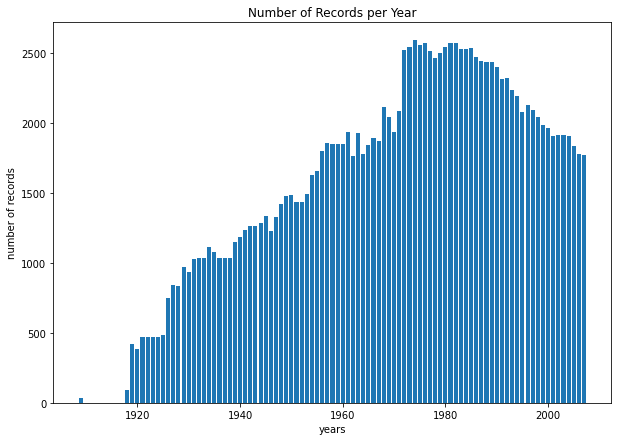

In [17]:

counts_numpy = numpy.unique(years, return_counts=True)
counts = [counts_numpy[0].tolist(), counts_numpy[1].tolist()]

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.title("Number of Records per Year")
plt.xlabel("years")
plt.ylabel("number of records")
plt.bar(counts[0], counts[1])
 
# Show Plot
plt.show()


As we can see the number of records per year are somewhat not distributed evenly.

The earlier you go in time, the less records are available.

However, that is not to say that older records are sparse.

Even in the 1920s we can see an average of 500 records per year which is not necessarily that far off from the maximum which is around 2500.

And not that far of from the mean of records per year: 

In [18]:
print("mean = ", numpy.mean(counts_numpy[1]), "variance = ", numpy.std(counts_numpy[1]))

mean =  1669.142857142857 variance =  670.5760779323502


However, we now have the full justification to get rid of the data points that have a year of 1909 as the number of records associated with this year are vey few compared to other years.

And this is in addition of the previous problems presented on this year.

In [19]:

indices = df[df["Year"] == 1909].index
df.drop(indices, inplace=True)



### State 


We now look at the States and State ANSI columns



We would like to first see if all the states are present in the data or if we have any missing ones. 


In [20]:
states = df["State"]

In [21]:
unique_states = states.unique()

print("The number of states recorded in the dataset is:")
print(len(unique_states))

The number of states recorded in the dataset is:
42


There are 50 US states, but in our data we only have 42 recorded unique values. 
As such, we have 8 missing states. 
We now want to see the States that are present, and which States are missing from the dataset woith no recorded data. 

In [22]:
print(unique_states)

['COLORADO' 'DELAWARE' 'IDAHO' 'ILLINOIS' 'INDIANA' 'KANSAS' 'MARYLAND'
 'MINNESOTA' 'MISSOURI' 'MONTANA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA'
 'OREGON' 'SOUTH DAKOTA' 'VIRGINIA' 'WASHINGTON' 'WYOMING' 'WEST VIRGINIA'
 'ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'FLORIDA' 'GEORGIA'
 'LOUISIANA' 'MICHIGAN' 'MISSISSIPPI' 'NEBRASKA' 'NEW JERSEY' 'NEW MEXICO'
 'PENNSYLVANIA' 'TENNESSEE' 'TEXAS' 'WISCONSIN' 'SOUTH CAROLINA' 'IOWA'
 'KENTUCKY' 'NEVADA' 'NEW YORK' 'NORTH CAROLINA' 'UTAH']


In [23]:
us_states= ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

for i in range(len(us_states)):
    us_states[i] = us_states[i].upper()
    
missing_states= us_states

for s in unique_states:
    missing_states.remove(s)
    
print(missing_states)

['ALASKA', 'CONNECTICUT', 'HAWAII', 'MAINE', 'MASSACHUSETTS', 'NEW HAMPSHIRE', 'RHODE ISLAND', 'VERMONT']


The states with no recorded data are: Alaska, Connecticuit, Hawii,, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont. 


We want to see how many records exist for each state.

We first map the state names to two letter acronyms so it is clearer on the graph.

In [24]:
us_state_to_abbrev = {
    "ALABAMA": "AL",
    "ALASKA": "AK",
    "ARIZONA": "AZ",
    "ARKANSAS": "AR",
    "CALIFORNIA": "CA",
    "COLORADO": "CO",
    "CONNECTICUT": "CT",
    "DELAWARE": "DE",
    "FLORIDA": "FL",
    "GEORGIA": "GA",
    "HAWAII": "HI",
    "IDAHO": "ID",
    "ILLINOIS": "IL",
    "INDIANA": "IN",
    "IOWA": "IA",
    "KANSAS": "KS",
    "KENTUCKY": "KY",
    "LOUISIANA": "LA",
    "MAINE": "ME",
    "MARYLAND": "MD",
    "MASSACHUSETTS": "MA",
    "MICHIGAN": "MI",
    "MINNESOTA": "MN",
    "MISSISSIPPI": "MS",
    "MISSOURI": "MO",
    "MONTANA": "MT",
    "NEBRASKA": "NE",
    "NEVADA": "NV",
    "NEW HAMPSHIRE": "NH",
    "NEW JERSEY": "NJ",
    "NEW MEXICO": "NM",
    "NEW YORK": "NY",
    "NORTH CAROLINA": "NC",
    "NORTH DAKOTA": "ND",
    "OHIO": "OH",
    "OKLAHOMA": "OK",
    "OREGON": "OR",
    "PENNSYLVANIA": "PA",
    "RHODE ISLAND": "RI",
    "SOUTH CAROLINA": "SC",
    "SOUTH DAKOTA": "SD",
    "TENNESSEE": "TN",
    "TEXAS": "TX",
    "UTAH": "UT",
    "VERMONT": "VT",
    "VIRGINIA": "VA",
    "WASHINGTON": "WA",
    "WEST VIRGINIA": "WV",
    "WISCONSIN": "WI",
    "WYOMING": "WY",
}

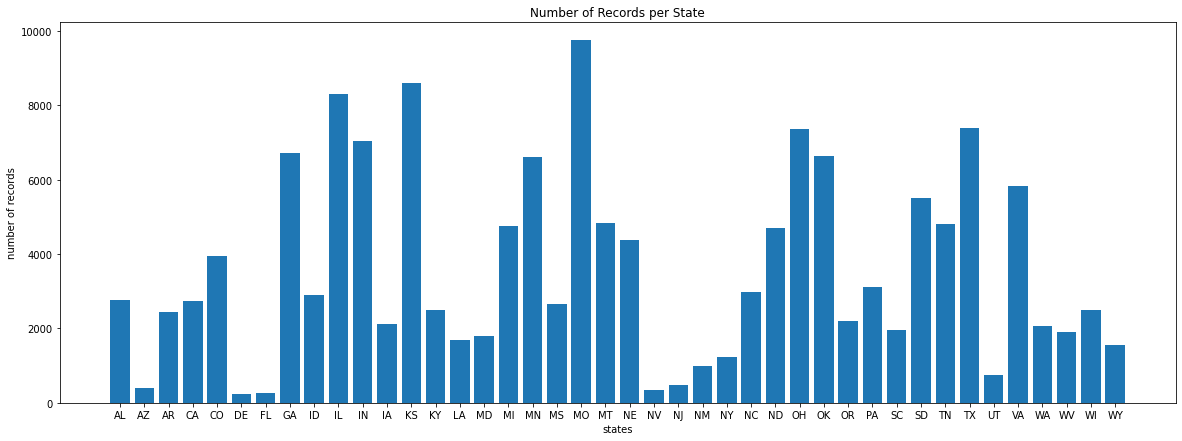

In [25]:
counts_numpy_per_state = numpy.unique(states, return_counts=True)
counts_state = [counts_numpy_per_state[0].tolist(), counts_numpy_per_state[1].tolist()]

for i in range(len(counts_state[0])):
    counts_state[0][i]=us_state_to_abbrev[counts_state[0][i]]

# Figure Size
fig = plt.figure(figsize =(20, 7))

plt.title("Number of Records per State")
plt.xlabel("states")
plt.ylabel("number of records")
plt.bar(counts_state[0], counts_state[1])
 
# Show Plot
plt.show()

In [26]:
# for i in range(len(counts_state[1])):
#     print(counts_state[0][i], counts_state[1][i])

min_statecount= min(counts_state[1])
min_index= counts_state[1].index(min_statecount)
min_state= counts_state[0][min_index]

max_statecount= max(counts_state[1])
max_index= counts_state[1].index(max_statecount)
max_state= counts_state[0][max_index]

avg_statecount= numpy.round(numpy.mean(counts_state[1]), decimals=1)
var= numpy.round(numpy.var(counts_state[1]), decimals=1)

print(counts_state[1])
print("The minimum records per state is: {} in state {}".format(min_statecount, min_state))
print("The maximum records per state is:  {} in state {}".format(max_statecount, max_state))
print("The average records per state is: {}".format(avg_statecount))
print("The variance for the records per state is: {}".format(var))

[2759, 391, 2450, 2736, 3943, 243, 263, 6722, 2892, 8317, 7039, 2114, 8600, 2487, 1681, 1787, 4751, 6608, 2669, 9750, 4848, 4389, 344, 473, 985, 1223, 2994, 4708, 7373, 6649, 2204, 3125, 1952, 5520, 4799, 7399, 745, 5837, 2064, 1904, 2485, 1546]
The minimum records per state is: 243 in state DE
The maximum records per state is:  9750 in state MO
The average records per state is: 3613.5
The variance for the records per state is: 6496837.9


As we can see, the average number of records per state is 3,615, the maximum is 9,750 and the minimum is 243. 

Later on, we will try to aggregate other factors based on state and try to observe any correclations between external factors and the value of crops grown and possibly the reason for having more or less agriucultural records. 

###State ANSI



In [27]:
state_ansi = df["State ANSI"]

We make sure there is an equal number of state ANSI and State Names to ensure that they are mapped in a 1:1 mapping, with no overlap between them. 
As such, we can use the State or State ANSI columns interchangeably. 

In [28]:
#print(numpy.unique(state_ansi))
print(len(numpy.unique(state_ansi)))

42


We will now make a mapping between the State and State ASNI which might come in handy for easier representation and visualization later on.

In [29]:
state_ansi = df["State ANSI"].unique()
states = df["State"].unique()

state_to_ansi={}
for i in range(len(states)):
    if states[i] not in state_to_ansi.keys():
        state_name= states[i]
        state_ansi_name= state_ansi[i]
        state_to_ansi[state_name]= state_ansi_name
print(state_to_ansi)

{'COLORADO': 8, 'DELAWARE': 10, 'IDAHO': 16, 'ILLINOIS': 17, 'INDIANA': 18, 'KANSAS': 20, 'MARYLAND': 24, 'MINNESOTA': 27, 'MISSOURI': 29, 'MONTANA': 30, 'NORTH DAKOTA': 38, 'OHIO': 39, 'OKLAHOMA': 40, 'OREGON': 41, 'SOUTH DAKOTA': 46, 'VIRGINIA': 51, 'WASHINGTON': 53, 'WYOMING': 56, 'WEST VIRGINIA': 54, 'ALABAMA': 1, 'ARIZONA': 4, 'ARKANSAS': 5, 'CALIFORNIA': 6, 'FLORIDA': 12, 'GEORGIA': 13, 'LOUISIANA': 22, 'MICHIGAN': 26, 'MISSISSIPPI': 28, 'NEBRASKA': 31, 'NEW JERSEY': 34, 'NEW MEXICO': 35, 'PENNSYLVANIA': 42, 'TENNESSEE': 47, 'TEXAS': 48, 'WISCONSIN': 55, 'SOUTH CAROLINA': 45, 'IOWA': 19, 'KENTUCKY': 21, 'NEVADA': 32, 'NEW YORK': 36, 'NORTH CAROLINA': 37, 'UTAH': 49}



### Agricultural District and Agricultural District Code

We will now look and the agricultural district column.

However, before we proceed, we must understand what an agricultural district is.

A district is a logical organisation of land that is genrally under the jurisdiction of a county.

According to the New York state government website, agricultural districts are managed and created by counties, with the guidance of states.

Agricultural districts are therefore, a sub-domain of counties.

This column is quite a complex one since it operates at a finer grain of detail compared to counties (our base line measurment).

Furthuremore, contrary to counties, agricultural districts are highly dependent on local politics and may be created, modified, and destroyed at the whim of local governance.

Therefore, the interpretation of records using this column becomes even more complex when taking into account changes made to those districts.

We will now take a look at the data before continuing our analysis.


In [30]:

agdistricts = df[["Ag District", "Ag District Code"]]


In [31]:

unique_districts = agdistricts.groupby(["Ag District", "Ag District Code"]).size().reset_index(name='Freq')
print(unique_districts)


          Ag District  Ag District Code  Freq
0          BLACK BELT                40   336
1          BLACKLANDS                40   993
2           BLUEGRASS                50   532
3             CENTRAL                20   397
4             CENTRAL                30   727
..                ...               ...   ...
104           WESTERN                10   860
105           WESTERN                40   805
106  WESTERN MOUNTAIN                20   156
107       WESTERN RIM                30   612
108         WIREGRASS                60   404

[109 rows x 3 columns]


It seems like the agricultural district and its convening code does not match.

Some districts have the same code while others have two different codes for the same district.

It is not really possible to fix that without looking at the data at large. 

It may be the case that the agricultural district "WESTERN" is duplicated because this name exists in multiple states.

However, what is sure, is that it seems like the agricultural district codes seem to be illogically distributed among records.

The agricultutal district column gives us more information than the code one.

For example, we might be able to extract information like the position of the record within the county or state such as: in the "western" part of the county.

For now, we will keep the ag district code but concentrate on the agricultural districts alone. 

However, we will chose to keep the names that are the same in separate rows as they might actually be separate districts.

In [32]:

unique_districts = unique_districts[["Ag District", "Freq"]]



We will now proceed to analyze the distribution of records among districts.


In [33]:

print( "Average number of records per district:", numpy.mean(unique_districts["Freq"]) )
print( "Variance of the frequency of records per district:", numpy.var(unique_districts["Freq"]) )
print( "Max frequency:", numpy.max(unique_districts["Freq"]) )
print( "Min frequency:", numpy.min(unique_districts["Freq"]) )



Average number of records per district: 1392.366972477064
Variance of the frequency of records per district: 7079182.122211932
Max frequency: 16115
Min frequency: 40


As we can see, while the mean seems acceptanle at 1392, the variance is exeptionally high.

This can also be seen in the difference between the max frequency, and the min frequency.

To understand what is happening, let's look at the different quartiles.

In [34]:
quants = numpy.quantile(unique_districts["Freq"], [0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
print( f"10% of records have a frequency per district less than {quants[0]}" )
print( f"25% of records have a frequency per district less than {quants[1]}" )
print( f"50% of records have a frequency per district less than {quants[2]}" )
print( f"75% of records have a frequency per district less than {quants[3]}" )
print( f"90% of records have a frequency per district less than {quants[4]}" )
print( f"95% of records have a frequency per district less than {quants[5]}" )

10% of records have a frequency per district less than 166.8
25% of records have a frequency per district less than 310.0
50% of records have a frequency per district less than 557.0
75% of records have a frequency per district less than 993.0
90% of records have a frequency per district less than 1971.8000000000006
95% of records have a frequency per district less than 8414.399999999998


As we can see the majority of records per district are heavily skewed towards the lowe side.

While very few have a very large amount of records.

This distribution seems very uneven.

Let us look at this distribution.

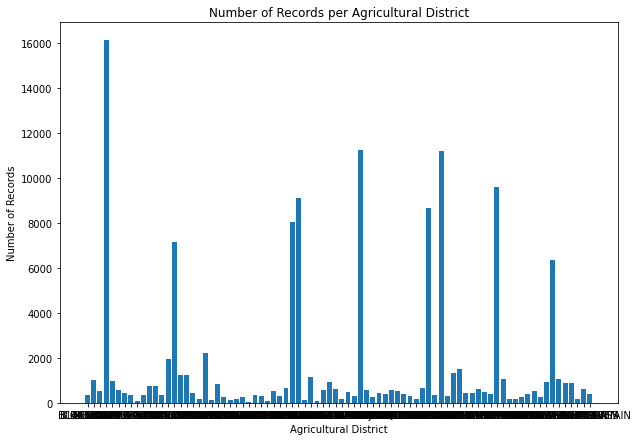

In [35]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.title("Number of Records per Agricultural District")
plt.xlabel("Agricultural District")
plt.ylabel("Number of Records")
plt.bar(unique_districts["Ag District"], unique_districts["Freq"])
 
# Show Plot
plt.show()

As we can see this distribution is quite uneven.

However, without looking at the full picture, we are unable to make conclusions upon the impact of such a distribution.

We will later analyse those aspects by breaking down this agricultural district column by state counties and years.

This will allow us to understand why there is such a distinct distribution of records.

### Yield Column (Value)

Now let's explore the value column and do preliminary statistical calculations, to get the mean, variance and standard deviation

In [36]:
value = df['Value']
print(value.head())

0    11.5
1    10.0
2     5.0
3    14.0
4     8.0
Name: Value, dtype: float64


Mean of Value Column:

In [37]:
value_mean = value.mean()
print(value_mean)

31.27824706130323


Median of Value Column:

In [38]:
value_median = value.median()
print(value_median)

29.2


In [39]:
value_mode = value.mode()
print(value_mode)

0    30.0
dtype: float64


Standard Deviation of Value column:

In [40]:
value_std = value.std()
print(value_std)

15.666388474221483


Variance of Value column:

In [41]:
value_variance = value_std*value_std
print(value_variance)

245.43572782521971


Max of Value column:

In [42]:
value_max = value.max()
print(value_max)

127.8


Min of Value Column - count how many zeros do we have, see in what state and county. 
This might be an error (as in missing data), or may be true data reflective of the fact that the area is not suitable for wheat plantation or wheat yield wss in fact 0 due to an external cause (a fire, drought season, or something major that happened)

In [43]:
value_min = value.min()
print(value_min)

0.0


We try to see where these 0 values show, if they are mostly within the same states then it may truly reflect a 0 value, and if it is in a common year, it might be due to a natural occurence that did yield a 0 value. If not, then we can treat the 0 vlaues as missing data entries. 

In [44]:
df_zeroes= df.loc[df['Value'] == 0]
df_zeroes
# df_zeroes=df_zeroes.drop(columns=["Week Ending", "County ANSI", "Zip Code", "Region", "watershed_code", "Watershed"])
# df_zeroes.info()

Year           State  State ANSI  ... Zip Code  Region Value
15     2007         ARIZONA           4  ...      NaN     NaN   0.0
968    2007          NEVADA          32  ...      NaN     NaN   0.0
975    2007          NEVADA          32  ...      NaN     NaN   0.0
1056   2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
1095   2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
...     ...             ...         ...  ...      ...     ...   ...
16088  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16089  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16090  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16168  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0
16210  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0

[118 rows x 10 columns]

In [45]:
df_zeroes.head()

Year           State  State ANSI  ... Zip Code  Region Value
15    2007         ARIZONA           4  ...      NaN     NaN   0.0
968   2007          NEVADA          32  ...      NaN     NaN   0.0
975   2007          NEVADA          32  ...      NaN     NaN   0.0
1056  2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
1095  2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0

[5 rows x 10 columns]

In [46]:
print(df_zeroes)

       Year           State  State ANSI  ... Zip Code  Region Value
15     2007         ARIZONA           4  ...      NaN     NaN   0.0
968    2007          NEVADA          32  ...      NaN     NaN   0.0
975    2007          NEVADA          32  ...      NaN     NaN   0.0
1056   2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
1095   2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
...     ...             ...         ...  ...      ...     ...   ...
16088  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16089  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16090  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16168  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0
16210  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0

[118 rows x 10 columns]


In [47]:
uniquestates= df_zeroes['State'].unique()
uniqueyear= df_zeroes['Year'].unique()
uniquecounty= df_zeroes['County'].unique()

print("The unique states with 0 value are:", uniquestates, '\n')
print("The unique years with 0 value entries:", uniqueyear, '\n')
print("The unique counties with 0 value entries:", uniquecounty, '\n')

The unique states with 0 value are: ['ARIZONA' 'NEVADA' 'NORTH CAROLINA' 'OKLAHOMA' 'PENNSYLVANIA'
 'CALIFORNIA' 'VIRGINIA' 'ARKANSAS' 'FLORIDA' 'TEXAS' 'NEW MEXICO'
 'WYOMING' 'MISSOURI' 'UTAH' 'COLORADO' 'ALABAMA' 'OREGON'] 

The unique years with 0 value entries: [2007 2006 2005 2004 2003 2002 2001 2000 1999] 

The unique counties with 0 value entries: ['OTHER (COMBINED) COUNTIES' 'HAYWOOD' 'WASHINGTON' 'PLUMAS' 'YUBA'
 'SHASTA' 'ALBEMARLE' 'APPOMATTOX' 'BEDFORD' 'PRINCE WILLIAM' 'NOTTOWAY'
 'MONTGOMERY' 'PULASKI' 'ALLEGHANY' 'BOTETOURT' 'SHENANDOAH' 'CONVERSE'
 'SANTA CLARA' 'DE BACA' 'HARDING' 'MORA' 'EDDY' 'HIDALGO' 'SANPETE'
 'WEBER' 'ALAMEDA' 'SANTA BARBARA' 'CROWLEY' 'LAS ANIMAS' 'PERSHING'
 'RIO ARRIBA' 'GREENE' 'MACON' 'MOBILE' 'CLEBURNE' 'DE KALB' 'FRANKLIN'
 'BARBOUR' 'COVINGTON' 'HOUSTON' 'PIKE' 'CHURCHILL' 'VALENCIA' 'GRANT'
 'AVERY' 'JIM WELLS' 'CALHOUN' 'FLUVANNA' 'CATRON' 'TRINITY' 'MENARD'
 'CALDWELL' 'HAYS' 'LUNENBURG' 'SANDOVAL'] 



We now look at the 0 value entries per year and see if they belong to the same regions/ counties/ States. By doing so, we can try to make sense of the true nature of the 0 values. 

In [48]:
df_zeroes_2007= df_zeroes.loc[df_zeroes['Year'] == 2007]
df_zeroes_2007

Year           State  State ANSI  ... Zip Code  Region Value
15    2007         ARIZONA           4  ...      NaN     NaN   0.0
968   2007          NEVADA          32  ...      NaN     NaN   0.0
975   2007          NEVADA          32  ...      NaN     NaN   0.0
1056  2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
1095  2007  NORTH CAROLINA          37  ...      NaN     NaN   0.0
1271  2007        OKLAHOMA          40  ...      NaN     NaN   0.0
1352  2007    PENNSYLVANIA          42  ...      NaN     NaN   0.0
1356  2007    PENNSYLVANIA          42  ...      NaN     NaN   0.0

[8 rows x 10 columns]

In [49]:
df_zeroes_2006= df_zeroes.loc[df_zeroes['Year'] == 2006]
df_zeroes_2006

Year           State  State ANSI  ... Zip Code  Region Value
1787  2006         ARIZONA           4  ...      NaN     NaN   0.0
1832  2006      CALIFORNIA           6  ...      NaN     NaN   0.0
1841  2006      CALIFORNIA           6  ...      NaN     NaN   0.0
1850  2006      CALIFORNIA           6  ...      NaN     NaN   0.0
1851  2006      CALIFORNIA           6  ...      NaN     NaN   0.0
1854  2006      CALIFORNIA           6  ...      NaN     NaN   0.0
2811  2006  NORTH CAROLINA          37  ...      NaN     NaN   0.0
3421  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3423  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3424  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3455  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3474  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3477  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3479  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3480  2006        VIRGINIA          51  ...      NaN     NaN   0.0
3482  2006        VIRGINIA          51  ...      NaN     NaN   0.0

[16 rows x 10 columns]

In [50]:
df_zeroes_2005= df_zeroes.loc[df_zeroes['Year'] == 2005]
df_zeroes_2005

Year           State  State ANSI  ... Zip Code  Region Value
3599  2005        ARKANSAS           5  ...      NaN     NaN   0.0
3604  2005      CALIFORNIA           6  ...      NaN     NaN   0.0
3617  2005      CALIFORNIA           6  ...      NaN     NaN   0.0
3626  2005      CALIFORNIA           6  ...      NaN     NaN   0.0
3629  2005      CALIFORNIA           6  ...      NaN     NaN   0.0
3675  2005         FLORIDA          12  ...      NaN     NaN   0.0
4636  2005  NORTH CAROLINA          37  ...      NaN     NaN   0.0
4853  2005        OKLAHOMA          40  ...      NaN     NaN   0.0
5242  2005           TEXAS          48  ...      NaN     NaN   0.0
5263  2005        VIRGINIA          51  ...      NaN     NaN   0.0
5299  2005        VIRGINIA          51  ...      NaN     NaN   0.0
5318  2005        VIRGINIA          51  ...      NaN     NaN   0.0
5320  2005        VIRGINIA          51  ...      NaN     NaN   0.0
5321  2005        VIRGINIA          51  ...      NaN     NaN   0.0
5323  2005        VIRGINIA          51  ...      NaN     NaN   0.0

[15 rows x 10 columns]

In [51]:
df_zeroes_2004= df_zeroes.loc[df_zeroes['Year'] == 2004]
df_zeroes_2004

Year           State  State ANSI  ... Zip Code  Region Value
5531  2004         FLORIDA          12  ...      NaN     NaN   0.0
6436  2004      NEW MEXICO          35  ...      NaN     NaN   0.0
6441  2004      NEW MEXICO          35  ...      NaN     NaN   0.0
6503  2004  NORTH CAROLINA          37  ...      NaN     NaN   0.0
6734  2004        OKLAHOMA          40  ...      NaN     NaN   0.0
7215  2004        VIRGINIA          51  ...      NaN     NaN   0.0
7218  2004        VIRGINIA          51  ...      NaN     NaN   0.0
7221  2004        VIRGINIA          51  ...      NaN     NaN   0.0
7301  2004         WYOMING          56  ...      NaN     NaN   0.0

[9 rows x 10 columns]

In [52]:
df_zeroes_2003= df_zeroes.loc[df_zeroes['Year'] == 2003]
df_zeroes_2003

Year           State  State ANSI  ... Zip Code  Region Value
7350  2003        ARKANSAS           5  ...      NaN     NaN   0.0
7395  2003      CALIFORNIA           6  ...      NaN     NaN   0.0
8204  2003        MISSOURI          29  ...      NaN     NaN   0.0
8353  2003      NEW MEXICO          35  ...      NaN     NaN   0.0
8354  2003      NEW MEXICO          35  ...      NaN     NaN   0.0
8355  2003      NEW MEXICO          35  ...      NaN     NaN   0.0
8362  2003      NEW MEXICO          35  ...      NaN     NaN   0.0
8365  2003      NEW MEXICO          35  ...      NaN     NaN   0.0
8435  2003  NORTH CAROLINA          37  ...      NaN     NaN   0.0
8654  2003        OKLAHOMA          40  ...      NaN     NaN   0.0
8972  2003           TEXAS          48  ...      NaN     NaN   0.0
9067  2003            UTAH          49  ...      NaN     NaN   0.0
9076  2003            UTAH          49  ...      NaN     NaN   0.0

[13 rows x 10 columns]

In [53]:
df_zeroes_2002= df_zeroes.loc[df_zeroes['Year'] == 2002]
df_zeroes_2002

Year           State  State ANSI  ... Zip Code  Region Value
9258   2002        ARKANSAS           5  ...      NaN     NaN   0.0
9297   2002      CALIFORNIA           6  ...      NaN     NaN   0.0
9325   2002      CALIFORNIA           6  ...      NaN     NaN   0.0
9351   2002        COLORADO           8  ...      NaN     NaN   0.0
9352   2002        COLORADO           8  ...      NaN     NaN   0.0
10222  2002          NEVADA          32  ...      NaN     NaN   0.0
10243  2002      NEW MEXICO          35  ...      NaN     NaN   0.0
10362  2002  NORTH CAROLINA          37  ...      NaN     NaN   0.0
10832  2002           TEXAS          48  ...      NaN     NaN   0.0
11128  2002         WYOMING          56  ...      NaN     NaN   0.0

[10 rows x 10 columns]

In [54]:
df_zeroes_2001= df_zeroes.loc[df_zeroes['Year'] == 2001]
df_zeroes_2001

Year           State  State ANSI  ... Zip Code  Region Value
11136  2001         ALABAMA           1  ...      NaN     NaN   0.0
11138  2001         ALABAMA           1  ...      NaN     NaN   0.0
11139  2001         ALABAMA           1  ...      NaN     NaN   0.0
11143  2001         ALABAMA           1  ...      NaN     NaN   0.0
11146  2001         ALABAMA           1  ...      NaN     NaN   0.0
11148  2001         ALABAMA           1  ...      NaN     NaN   0.0
11150  2001         ALABAMA           1  ...      NaN     NaN   0.0
11159  2001         ALABAMA           1  ...      NaN     NaN   0.0
11160  2001         ALABAMA           1  ...      NaN     NaN   0.0
11164  2001         ALABAMA           1  ...      NaN     NaN   0.0
11166  2001         ALABAMA           1  ...      NaN     NaN   0.0
12118  2001          NEVADA          32  ...      NaN     NaN   0.0
12123  2001          NEVADA          32  ...      NaN     NaN   0.0
12147  2001      NEW MEXICO          35  ...      NaN     NaN   0.0
12152  2001      NEW MEXICO          35  ...      NaN     NaN   0.0
12229  2001  NORTH CAROLINA          37  ...      NaN     NaN   0.0
12231  2001  NORTH CAROLINA          37  ...      NaN     NaN   0.0
12271  2001  NORTH CAROLINA          37  ...      NaN     NaN   0.0
12501  2001          OREGON          41  ...      NaN     NaN   0.0
12843  2001           TEXAS          48  ...      NaN     NaN   0.0
12881  2001           TEXAS          48  ...      NaN     NaN   0.0
12905  2001        VIRGINIA          51  ...      NaN     NaN   0.0
12957  2001        VIRGINIA          51  ...      NaN     NaN   0.0
12959  2001        VIRGINIA          51  ...      NaN     NaN   0.0
12961  2001        VIRGINIA          51  ...      NaN     NaN   0.0

[25 rows x 10 columns]

In [55]:
df_zeroes_2000= df_zeroes.loc[df_zeroes['Year'] == 2000]
df_zeroes_2000

Year           State  State ANSI  ... Zip Code  Region Value
14101  2000      NEW MEXICO          35  ...      NaN     NaN   0.0
14105  2000      NEW MEXICO          35  ...      NaN     NaN   0.0
14109  2000      NEW MEXICO          35  ...      NaN     NaN   0.0
14110  2000      NEW MEXICO          35  ...      NaN     NaN   0.0
14111  2000      NEW MEXICO          35  ...      NaN     NaN   0.0
14190  2000  NORTH CAROLINA          37  ...      NaN     NaN   0.0
14230  2000  NORTH CAROLINA          37  ...      NaN     NaN   0.0
14723  2000           TEXAS          48  ...      NaN     NaN   0.0
14743  2000           TEXAS          48  ...      NaN     NaN   0.0
14751  2000           TEXAS          48  ...      NaN     NaN   0.0
14802  2000           TEXAS          48  ...      NaN     NaN   0.0
14804  2000           TEXAS          48  ...      NaN     NaN   0.0
14870  2000        VIRGINIA          51  ...      NaN     NaN   0.0
14922  2000        VIRGINIA          51  ...      NaN     NaN   0.0
14927  2000        VIRGINIA          51  ...      NaN     NaN   0.0

[15 rows x 10 columns]

In [56]:
df_zeroes_1999= df_zeroes.loc[df_zeroes['Year'] == 1999]
df_zeroes_1999

Year           State  State ANSI  ... Zip Code  Region Value
16082  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16084  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16088  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16089  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16090  1999      NEW MEXICO          35  ...      NaN     NaN   0.0
16168  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0
16210  1999  NORTH CAROLINA          37  ...      NaN     NaN   0.0

[7 rows x 10 columns]

In [57]:
df_zeroes_newmex1999= df.loc[(df['State'] == "NEW MEXICO") & (df['Year'] == 1999)]
df_zeroes_newmex1999

Year       State  State ANSI  ... Zip Code  Region  Value
16070  1999  NEW MEXICO          35  ...      NaN     NaN   36.0
16071  1999  NEW MEXICO          35  ...      NaN     NaN   36.5
16072  1999  NEW MEXICO          35  ...      NaN     NaN   56.0
16073  1999  NEW MEXICO          35  ...      NaN     NaN   20.0
16074  1999  NEW MEXICO          35  ...      NaN     NaN   18.8
16075  1999  NEW MEXICO          35  ...      NaN     NaN   29.6
16076  1999  NEW MEXICO          35  ...      NaN     NaN   32.3
16077  1999  NEW MEXICO          35  ...      NaN     NaN   31.5
16078  1999  NEW MEXICO          35  ...      NaN     NaN   55.4
16079  1999  NEW MEXICO          35  ...      NaN     NaN   62.5
16080  1999  NEW MEXICO          35  ...      NaN     NaN   20.0
16081  1999  NEW MEXICO          35  ...      NaN     NaN  106.0
16082  1999  NEW MEXICO          35  ...      NaN     NaN    0.0
16083  1999  NEW MEXICO          35  ...      NaN     NaN   62.0
16084  1999  NEW MEXICO          35  ...      NaN     NaN    0.0
16085  1999  NEW MEXICO          35  ...      NaN     NaN  100.0
16086  1999  NEW MEXICO          35  ...      NaN     NaN  110.0
16087  1999  NEW MEXICO          35  ...      NaN     NaN   38.3
16088  1999  NEW MEXICO          35  ...      NaN     NaN    0.0
16089  1999  NEW MEXICO          35  ...      NaN     NaN    0.0
16090  1999  NEW MEXICO          35  ...      NaN     NaN    0.0
16091  1999  NEW MEXICO          35  ...      NaN     NaN  100.0
16092  1999  NEW MEXICO          35  ...      NaN     NaN   76.0
16093  1999  NEW MEXICO          35  ...      NaN     NaN   76.0

[24 rows x 10 columns]

In [58]:
# df_imputed= df
# df_imputed= df_imputed.drop(columns=["Zip Code", "Region"])
# df_imputed
#df_imputed['Value'].min()
#df_imputed = pandas.DataFrame(KNN(k = 3).fit_transform(df_imputed), columns = df_imputed.Value)

Range of Value column:

In [59]:
value_range = value_max - value_min
print(value_range)

127.8


Statistical Summary of the Value column:

In [60]:
value.describe()

count    151768.000000
mean         31.278247
std          15.666388
min           0.000000
25%          20.000000
50%          29.200000
75%          39.500000
max         127.800000
Name: Value, dtype: float64

Boxplot of Value column:

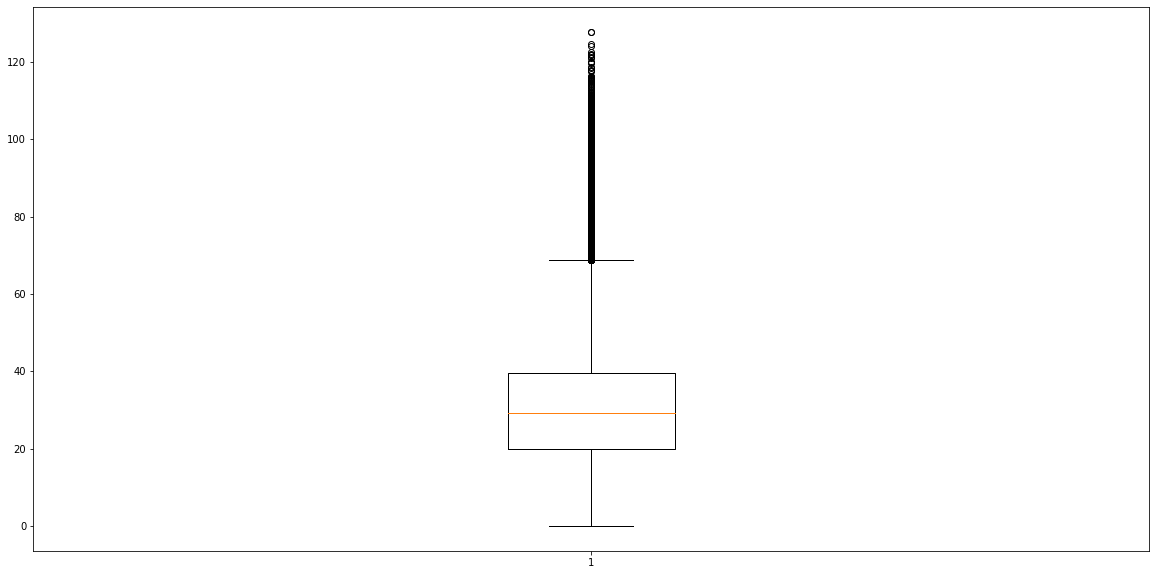

In [61]:
fig = plt.figure(figsize =(20, 10))
 
# Creating plot
plt.boxplot(value)
 
# show plot
plt.show()

We can tell the minimum value is 0.0, which means there is no yield or 0 yield in that area (or it can be represented by missing values that were filled in by 0), whereas the maximum is 127.8. Around 50% of the data has yield between almost 20 and 40.The interquartile range is around 20. (will get more precise numbers soon)

Now let's build a histogram to check the distribution of the data:

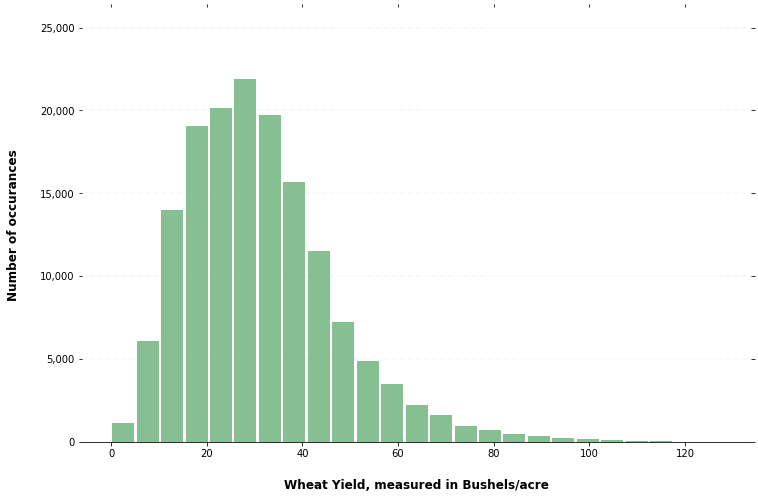

In [62]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='Value', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Wheat Yield, measured in Bushels/acre", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of occurances", labelpad=20, weight='bold', size=12)

    
    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

We can tell the data is right skewed and it is obviously not a normal distribution.

### County

We now look at the County data to check the number of unique counties

In [63]:
counties = df["County"]

In [64]:
unique_counties = counties.unique()

print("The number of counties recorded in the dataset is:")
print(len(unique_counties))

print(unique_counties)

The number of counties recorded in the dataset is:
1677
['ADAMS' 'ARAPAHOE' 'CHEYENNE' ... 'WINKLER' 'AVERY' 'ZAPATA']


Records Per county

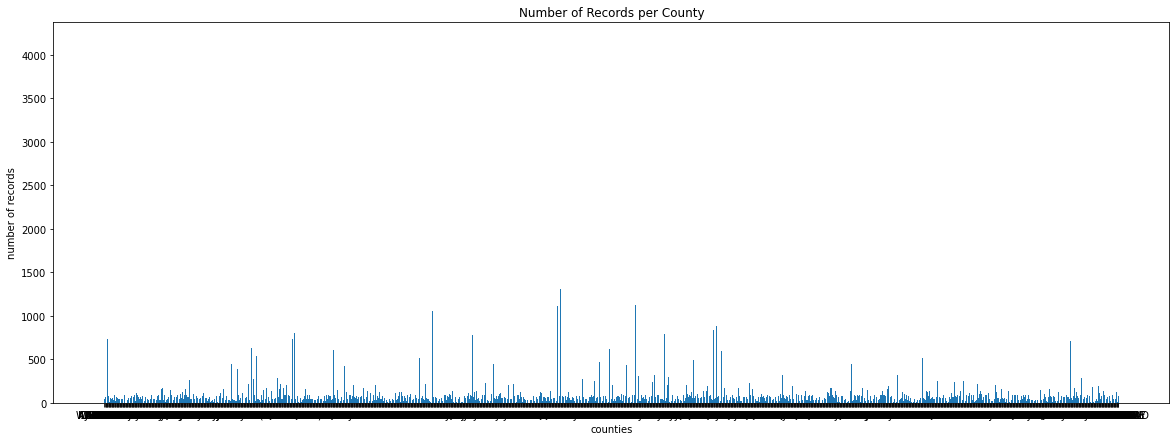

In [65]:
counts_numpy_per_county = numpy.unique(counties, return_counts=True)
counts_county = [counts_numpy_per_county[0].tolist(), counts_numpy_per_county[1].tolist()]

for i in range(len(unique_counties)):
    counts_county[0][i]=unique_counties[i]

# Figure Size
fig = plt.figure(figsize =(20, 7))

plt.title("Number of Records per County")
plt.xlabel("counties")
plt.ylabel("number of records")
plt.bar(counts_county[0], counts_county[1])
 
# Show Plot
plt.show()

In [66]:
print( "Average number of records per county:", numpy.mean(counts_county[1]) )
print( "Variance of the frequency of records per county:", numpy.var(counts_county[1]) )
print( "Max frequency:", numpy.max(counts_county[1]) )
print( "Min frequency:", numpy.min(counts_county[1]) )

Average number of records per county: 90.49970184853906
Variance of the frequency of records per county: 24196.005515713136
Max frequency: 4164
Min frequency: 1


## Analysis Between Columns


### Agricultural District vs. Year



We will now start exploring agricultural district in the context of years.

That is, we will first look at the different agricultural districts that are represented in every year.


In [67]:

agdistANDyear = df[["Ag District", "Ag District Code", "Year"]]


In [68]:

agdistANDyear = agdistANDyear.groupby(["Ag District", "Ag District Code"]).agg(list).reset_index()
agdistANDyear


Ag District  ...                                               Year
0          BLACK BELT  ...  [1969, 1969, 1969, 1969, 1969, 1969, 1968, 196...
1          BLACKLANDS  ...  [1969, 1969, 1969, 1969, 1969, 1969, 1969, 196...
2           BLUEGRASS  ...  [1989, 1989, 1989, 1989, 1989, 1989, 1989, 198...
3             CENTRAL  ...  [1939, 1939, 1939, 1939, 1939, 1939, 1969, 196...
4             CENTRAL  ...  [1989, 1989, 1989, 1989, 1989, 1989, 1989, 198...
..                ...  ...                                                ...
104           WESTERN  ...  [1939, 1939, 1939, 1939, 1939, 1939, 1939, 193...
105           WESTERN  ...  [1939, 1939, 1939, 1939, 1939, 1939, 1939, 193...
106  WESTERN MOUNTAIN  ...  [1989, 1989, 1989, 1989, 1989, 1988, 1988, 198...
107       WESTERN RIM  ...  [1969, 1969, 1969, 1969, 1969, 1969, 1969, 196...
108         WIREGRASS  ...  [1969, 1969, 1969, 1969, 1969, 1969, 1969, 196...

[109 rows x 3 columns]


As we can see, it seems like not every year is represented per Ag District.

The reasons may be numerous.

Maybe that date was not recorded, or that the district did not exist at the time.

In addition to that, some districts seem to be represented multiple times in the same year.

This should not be the case, and the reason that this is so is not yet clear.

Probably, after analysing the the dataset more, we might be able to answer that question.

For now, we will continue our analysis despite this problem.

Unfortunatly, with so many districts, it would be very difficult to represent them in a graph, however, we will try to do it.


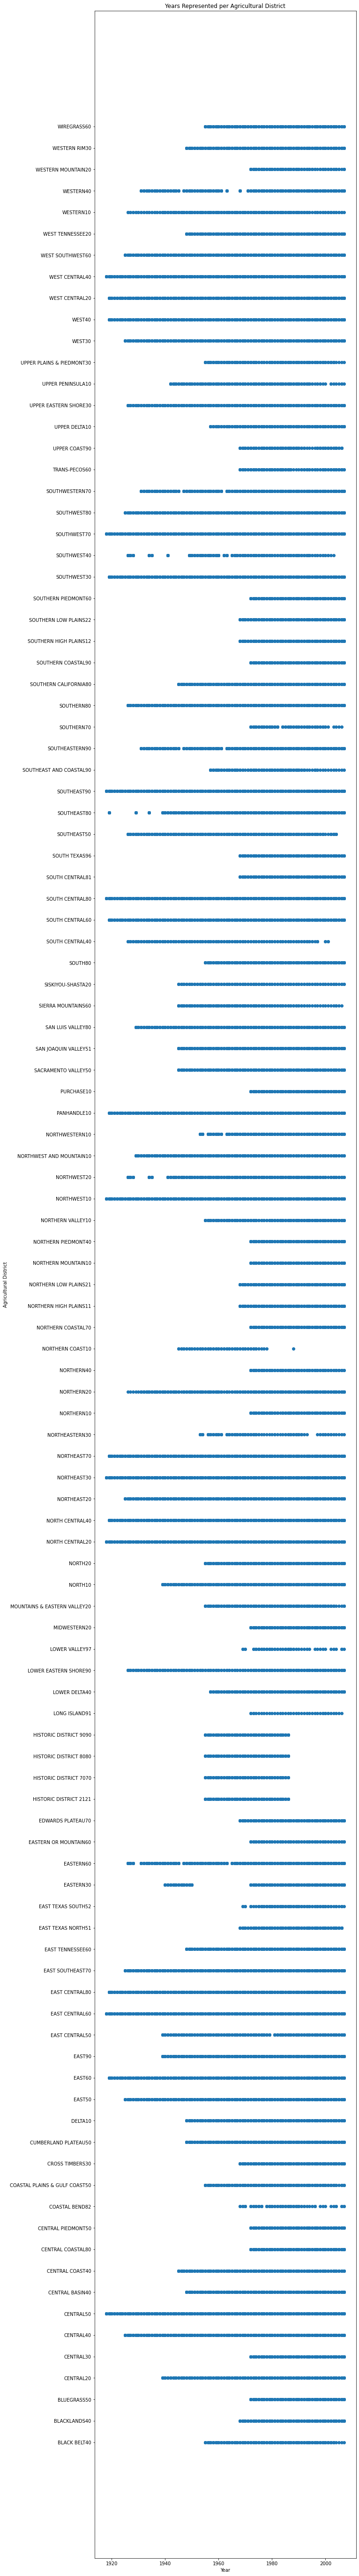

In [69]:

agdistANDyear["unique name"] = agdistANDyear["Ag District"] + agdistANDyear["Ag District Code"].astype(str)

points = [[], []]
for i in range( len(agdistANDyear) ):
    for j in range( len(agdistANDyear["Year"][i]) ):
        points[0].append(agdistANDyear["unique name"][i])
        points[1].append(agdistANDyear["Year"][i][j])
        
        
fig = plt.figure(figsize =(10, 100))

plt.title("Years Represented per Agricultural District")
plt.xlabel("Year")
plt.ylabel("Agricultural District")
plt.scatter(points[1], points[0])
        
plt.show()



As can be clearly seen from the graph above, there are missing values for the recorded years per district.

However, this is not necessarily critical as most of the values present are continuous within a bounded time slot.





### Value per State

First, let's get the mean yield per state

In [70]:
df_mean= df[["State", "Value"]].groupby("State").mean()

In [71]:
df_mean.head()

Value
State                
ALABAMA     29.274411
ARIZONA     69.998210
ARKANSAS    34.496612
CALIFORNIA  41.596199
COLORADO    27.035582

We display the states ordered by decreasing values of mean value of wheat produced. 

In [72]:
df_mean.sort_values(by=['Value'], ascending=False)

Value
State                    
ARIZONA         69.998210
NEVADA          63.754651
IDAHO           50.326037
OREGON          45.801497
NEW YORK        45.401554
UTAH            43.844564
NEW JERSEY      42.259619
WASHINGTON      41.938469
CALIFORNIA      41.596199
KENTUCKY        41.521070
WISCONSIN       41.335211
NORTH CAROLINA  39.177221
IOWA            38.112394
PENNSYLVANIA    36.747904
NEW MEXICO      36.688223
MICHIGAN        36.331046
INDIANA         36.204560
ILLINOIS        36.052423
DELAWARE        34.760082
ARKANSAS        34.496612
MARYLAND        33.676833
NEBRASKA        33.398154
OHIO            33.366092
GEORGIA         31.568878
LOUISIANA       31.154670
MISSISSIPPI     30.880405
VIRGINIA        30.703289
SOUTH CAROLINA  30.445287
TENNESSEE       30.242363
ALABAMA         29.274411
COLORADO        27.035582
WEST VIRGINIA   26.960504
MISSOURI        26.903015
FLORIDA         26.166540
KANSAS          25.627698
TEXAS           25.537086
MINNESOTA       24.826226
WYOMING         24.737969
MONTANA         23.430631
SOUTH DAKOTA    21.266051
OKLAHOMA        20.912468
NORTH DAKOTA    20.073556

Median wheat yield in every state

In [73]:
df[["State", "Value"]].groupby("State").median()

Value
State                
ALABAMA         27.00
ARIZONA         71.10
ARKANSAS        33.00
CALIFORNIA      33.00
COLORADO        23.00
DELAWARE        31.60
FLORIDA         25.00
GEORGIA         30.00
IDAHO           44.90
ILLINOIS        35.00
INDIANA         34.60
IOWA            37.30
KANSAS          25.00
KENTUCKY        39.00
LOUISIANA       30.00
MARYLAND        30.50
MICHIGAN        34.00
MINNESOTA       22.10
MISSISSIPPI     29.80
MISSOURI        26.30
MONTANA         22.20
NEBRASKA        33.40
NEVADA          61.70
NEW JERSEY      41.30
NEW MEXICO      32.00
NEW YORK        44.00
NORTH CAROLINA  38.00
NORTH DAKOTA    19.00
OHIO            30.00
OKLAHOMA        20.10
OREGON          39.00
PENNSYLVANIA    34.00
SOUTH CAROLINA  31.00
SOUTH DAKOTA    19.30
TENNESSEE       30.00
TEXAS           24.50
UTAH            41.00
VIRGINIA        27.00
WASHINGTON      38.35
WEST VIRGINIA   25.00
WISCONSIN       38.00
WYOMING         22.15

Standard deviation of wheat yield in every state

In [74]:
df[["State", "Value"]].groupby("State").std()

Value
State                    
ALABAMA          9.693747
ARIZONA         23.112121
ARKANSAS        10.983720
CALIFORNIA      23.967205
COLORADO        18.032766
DELAWARE        16.730200
FLORIDA          7.557087
GEORGIA         10.272322
IDAHO           24.565693
ILLINOIS        16.879489
INDIANA         16.743048
IOWA             9.346731
KANSAS          12.036464
KENTUCKY        11.336457
LOUISIANA       11.007213
MARYLAND        15.885830
MICHIGAN        14.059068
MINNESOTA       11.419392
MISSISSIPPI      9.708021
MISSOURI        13.424131
MONTANA         11.842936
NEBRASKA         9.447749
NEVADA          18.070435
NEW JERSEY       9.249320
NEW MEXICO      22.633596
NEW YORK         8.530735
NORTH CAROLINA   9.626058
NORTH DAKOTA    10.560023
OHIO            15.938480
OKLAHOMA         9.772953
OREGON          23.968982
PENNSYLVANIA    10.223541
SOUTH CAROLINA  11.712706
SOUTH DAKOTA    11.823505
TENNESSEE       11.405204
TEXAS            9.437659
UTAH            18.515469
VIRGINIA        15.898324
WASHINGTON      17.571787
WEST VIRGINIA   10.961732
WISCONSIN       12.986530
WYOMING         12.668769

Maximum wheat yield per state per year per county
on y axis: yield, x : years, and have 1 line per county or 1 line per state and we can plot that, we can have a visulization per state, this tell us if the wheat production improved over the years. 

In [75]:
df[["State", "Value"]].groupby("State").max()

Value
State                
ALABAMA          76.0
ARIZONA         115.3
ARKANSAS         74.0
CALIFORNIA      110.0
COLORADO        116.5
DELAWARE         75.5
FLORIDA          56.6
GEORGIA          70.0
IDAHO           127.8
ILLINOIS         94.0
INDIANA          95.0
IOWA             89.8
KANSAS           80.0
KENTUCKY         85.0
LOUISIANA        69.6
MARYLAND         80.0
MICHIGAN         93.0
MINNESOTA        65.0
MISSISSIPPI      70.9
MISSOURI         74.3
MONTANA          89.2
NEBRASKA         75.0
NEVADA          116.0
NEW JERSEY       67.0
NEW MEXICO      122.0
NEW YORK         71.0
NORTH CAROLINA   77.0
NORTH DAKOTA     57.1
OHIO             85.8
OKLAHOMA        104.3
OREGON          112.0
PENNSYLVANIA     86.7
SOUTH CAROLINA   70.0
SOUTH DAKOTA     77.0
TENNESSEE        88.0
TEXAS            88.2
UTAH             96.0
VIRGINIA         83.1
WASHINGTON      103.8
WEST VIRGINIA    68.1
WISCONSIN        91.0
WYOMING          92.0

Minimum wheat yield per state
get the number of zeroes in every state, or it is an NA, when the value was not provided 

In [76]:
df[["State", "Value"]].groupby("State").min()

Value
State                
ALABAMA           0.0
ARIZONA           0.0
ARKANSAS          0.0
CALIFORNIA        0.0
COLORADO          0.0
DELAWARE         10.9
FLORIDA           0.0
GEORGIA          10.0
IDAHO             7.9
ILLINOIS          4.0
INDIANA           6.8
IOWA             12.3
KANSAS            1.0
KENTUCKY         14.0
LOUISIANA         6.4
MARYLAND         10.0
MICHIGAN          2.2
MINNESOTA         2.0
MISSISSIPPI       7.9
MISSOURI          0.0
MONTANA           1.6
NEBRASKA          4.5
NEVADA            0.0
NEW JERSEY       10.0
NEW MEXICO        0.0
NEW YORK         27.0
NORTH CAROLINA    0.0
NORTH DAKOTA      1.0
OHIO              6.4
OKLAHOMA          0.0
OREGON            0.0
PENNSYLVANIA      0.0
SOUTH CAROLINA    1.5
SOUTH DAKOTA      0.9
TENNESSEE         8.0
TEXAS             0.0
UTAH              0.0
VIRGINIA          0.0
WASHINGTON        8.7
WEST VIRGINIA     7.0
WISCONSIN        16.0
WYOMING           0.0

### Yield per State per Year

In [77]:

aggregated_yield_per_year_per_state = df[["Year", "State", "Value"]]
aggregated_yield_per_year_per_state = aggregated_yield_per_year_per_state.groupby(["Year", "State"]).mean().reset_index()
aggregated_yield_per_year_per_state


Year          State      Value
0     1918           OHIO  17.904545
1     1919       MISSOURI  13.003509
2     1919        MONTANA   5.809804
3     1919   NORTH DAKOTA   5.924528
4     1919           OHIO  19.755682
...    ...            ...        ...
2581  2007           UTAH  55.500000
2582  2007       VIRGINIA  61.370000
2583  2007     WASHINGTON  55.984211
2584  2007  WEST VIRGINIA  51.266667
2585  2007      WISCONSIN  59.941176

[2586 rows x 3 columns]

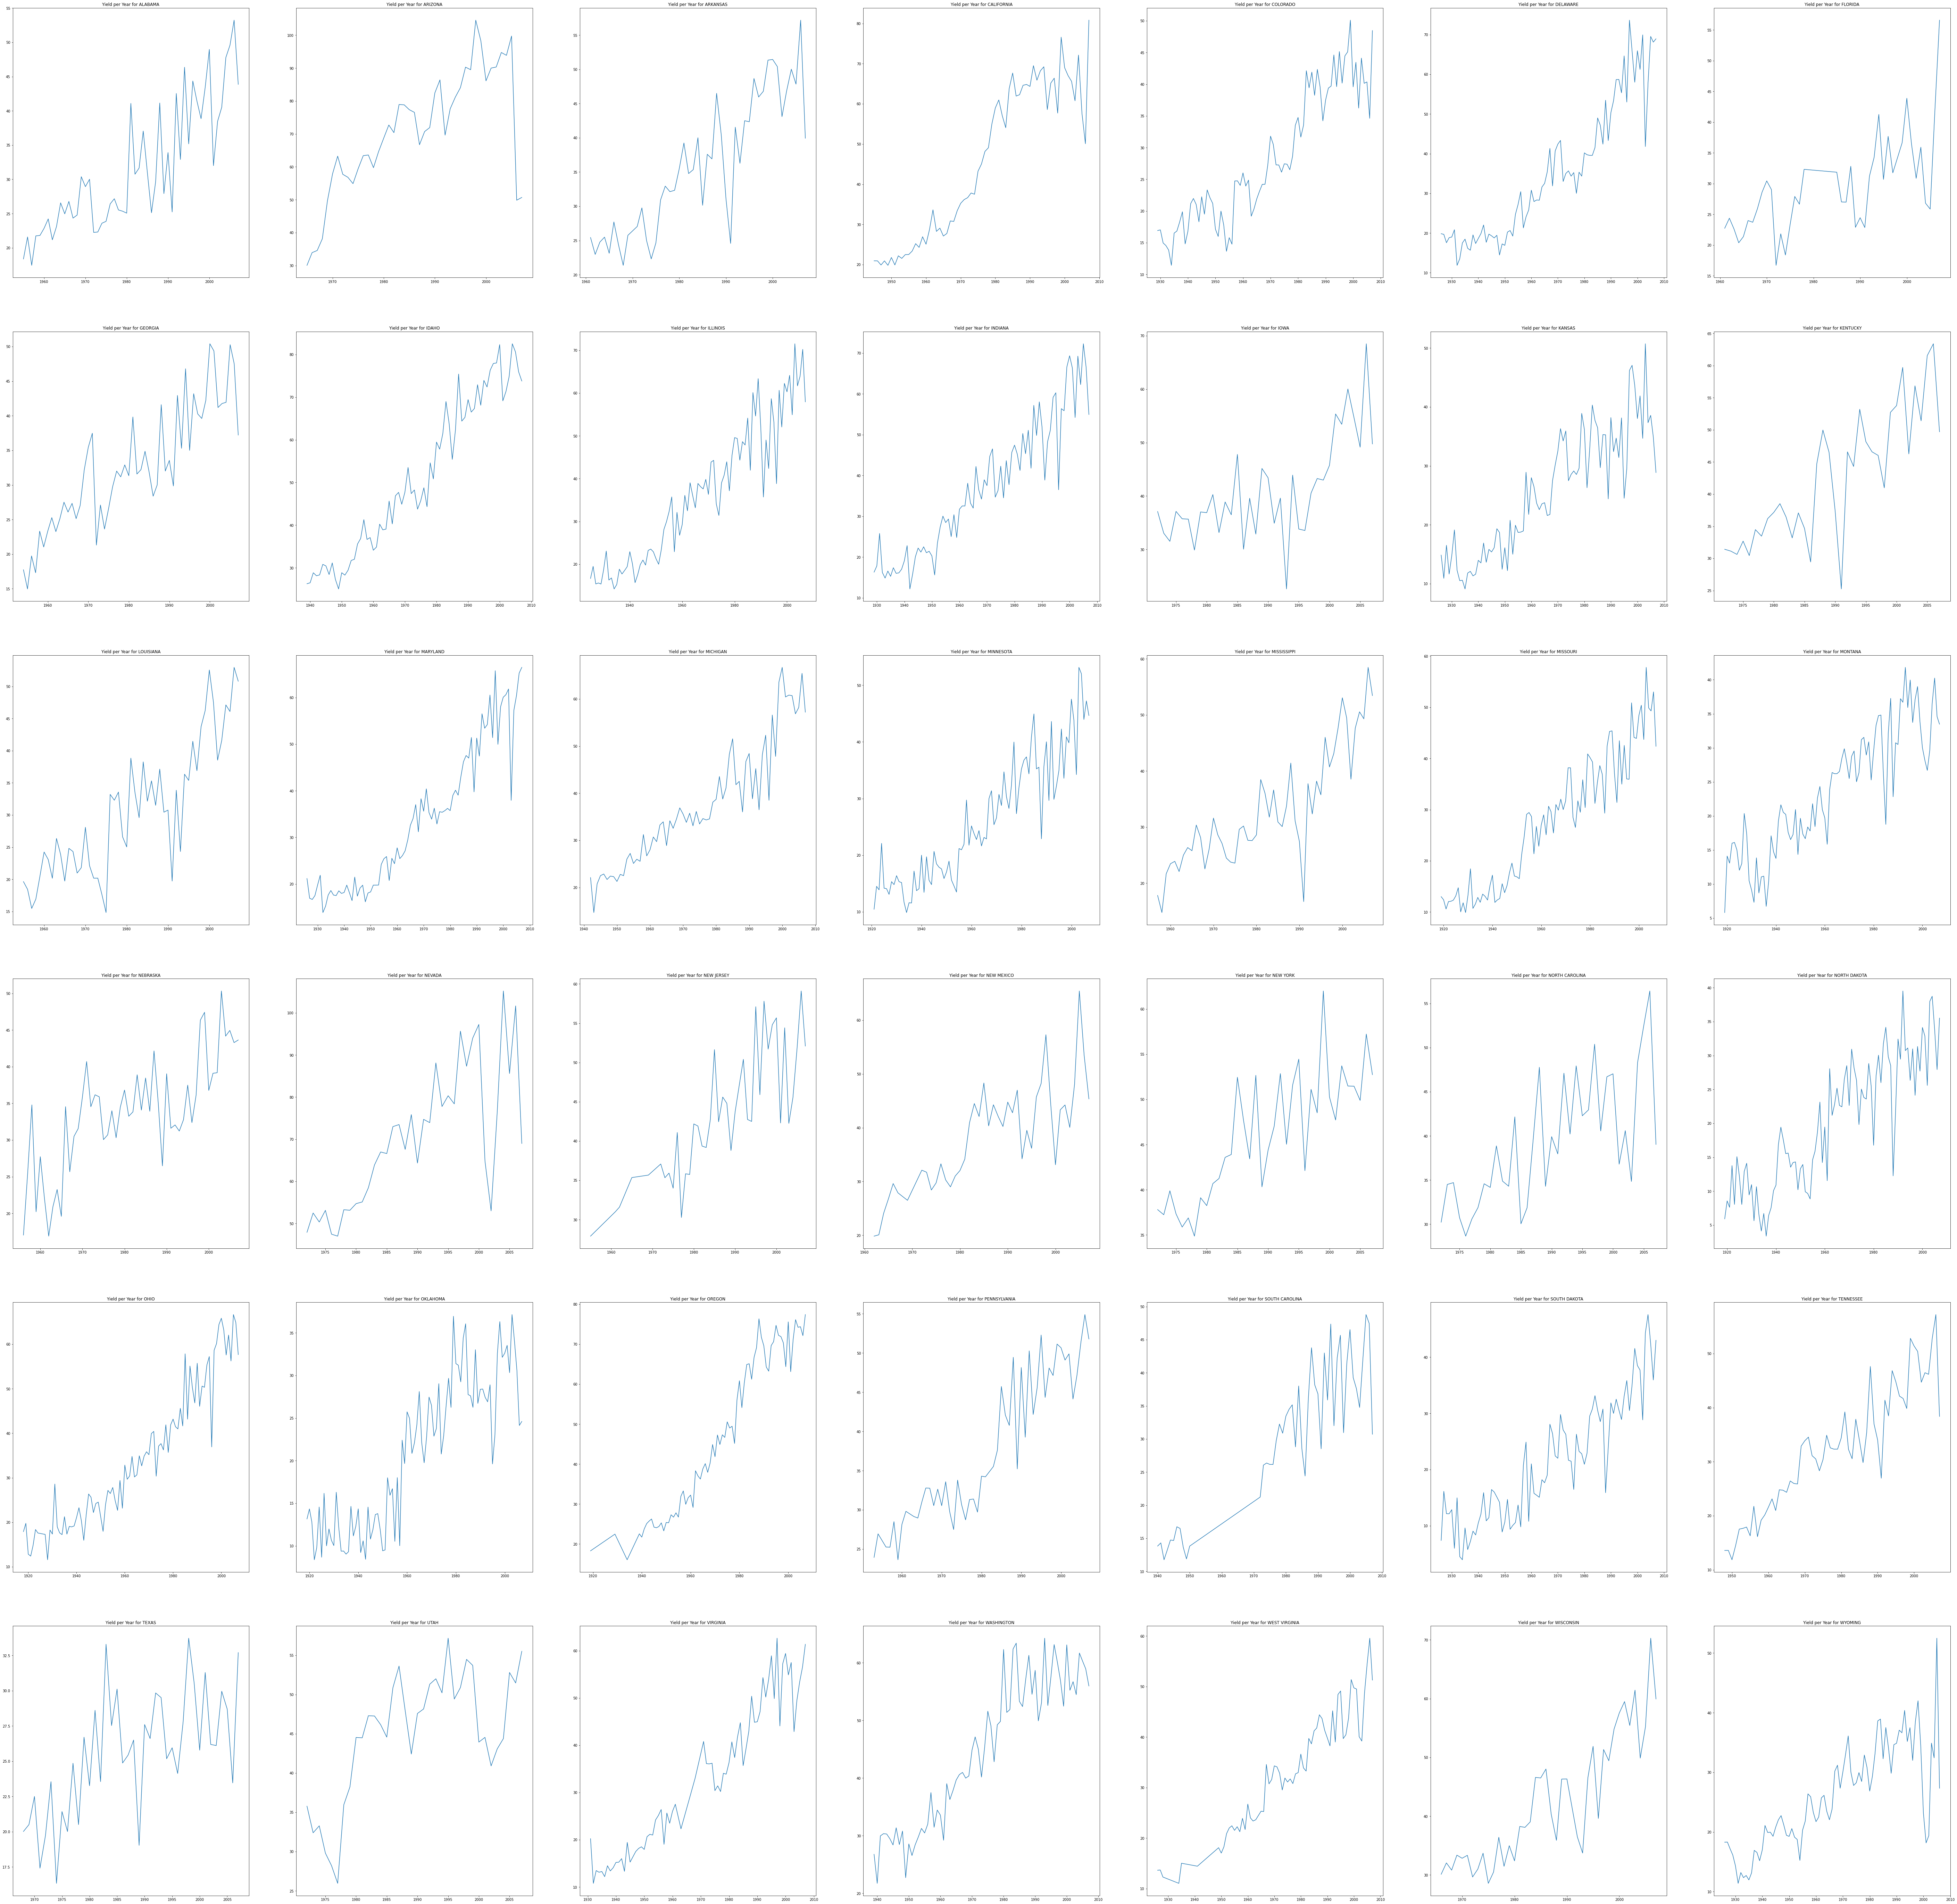

In [78]:

fig = plt.figure(figsize=(100,100))

pos = 1
for state in numpy.unique(aggregated_yield_per_year_per_state["State"].values):

  byState = aggregated_yield_per_year_per_state[ aggregated_yield_per_year_per_state["State"] == state ]
  ax = fig.add_subplot( 6, 7, pos )
  ax.title.set_text(f"Yield per Year for {state}")
  ax.plot( byState["Year"], byState["Value"] )
  pos+=1
  
plt.show()




### Value Per County


In [79]:
df[["County", "Value"]].groupby("County").mean()

Value
County              
ABBEVILLE  24.832500
ACADIA     32.820000
ACCOMACK   37.486957
ADA        63.740580
ADAIR      26.611712
...              ...
YUBA       46.584127
YUMA       45.815126
ZAPATA     19.480000
ZAVALA     25.192500
ZIEBACH    18.195062

[1677 rows x 1 columns]

Median wheat yield in every county


In [80]:
df[["County", "Value"]].groupby("County").median()

Value
County          
ABBEVILLE   26.5
ACADIA      32.0
ACCOMACK    38.0
ADA         47.6
ADAIR       27.3
...          ...
YUBA        46.0
YUMA        34.0
ZAPATA      17.6
ZAVALA      25.3
ZIEBACH     17.1

[1677 rows x 1 columns]

Standard deviation of wheat yield in every county


In [81]:
df[["County", "Value"]].groupby("County").std()

Value
County              
ABBEVILLE   9.420419
ACADIA     11.487246
ACCOMACK   17.831614
ADA        28.896953
ADAIR      12.524233
...              ...
YUBA       25.455415
YUMA       31.904085
ZAPATA      7.397417
ZAVALA      7.566572
ZIEBACH    10.155059

[1677 rows x 1 columns]

Maximum wheat yield per year per county on y axis: yield, x : years, and have 1 line per county or 1 line per state and we can plot that, we can have a visulization per state, this tell us if the wheat production improved over the years.

In [82]:
df[["County", "Value"]].groupby("County").max() 

Value
County          
ABBEVILLE   45.0
ACADIA      56.2
ACCOMACK    78.0
ADA        127.7
ADAIR       63.5
...          ...
YUBA        95.0
YUMA       115.3
ZAPATA      35.7
ZAVALA      43.5
ZIEBACH     40.9

[1677 rows x 1 columns]

Minimum wheat yield per county

### Yield Per County Per Year

In [83]:
aggregated_yield_per_year_per_county = df[["Year", "County", "Value"]]
aggregated_yield_per_year_per_county = aggregated_yield_per_year_per_county.groupby(["Year", "County"]).mean().reset_index()
aggregated_yield_per_year_per_county

Year     County  Value
0      1918      ADAMS   15.0
1      1918      ALLEN   24.3
2      1918    ASHLAND   19.6
3      1918  ASHTABULA   14.9
4      1918     ATHENS   13.2
...     ...        ...    ...
95343  2007      YOUNG   24.0
95344  2007       YUBA   91.7
95345  2007       YUMA   46.5
95346  2007     ZAVALA   26.0
95347  2007    ZIEBACH   30.4

[95348 rows x 3 columns]

ValueError: ignored

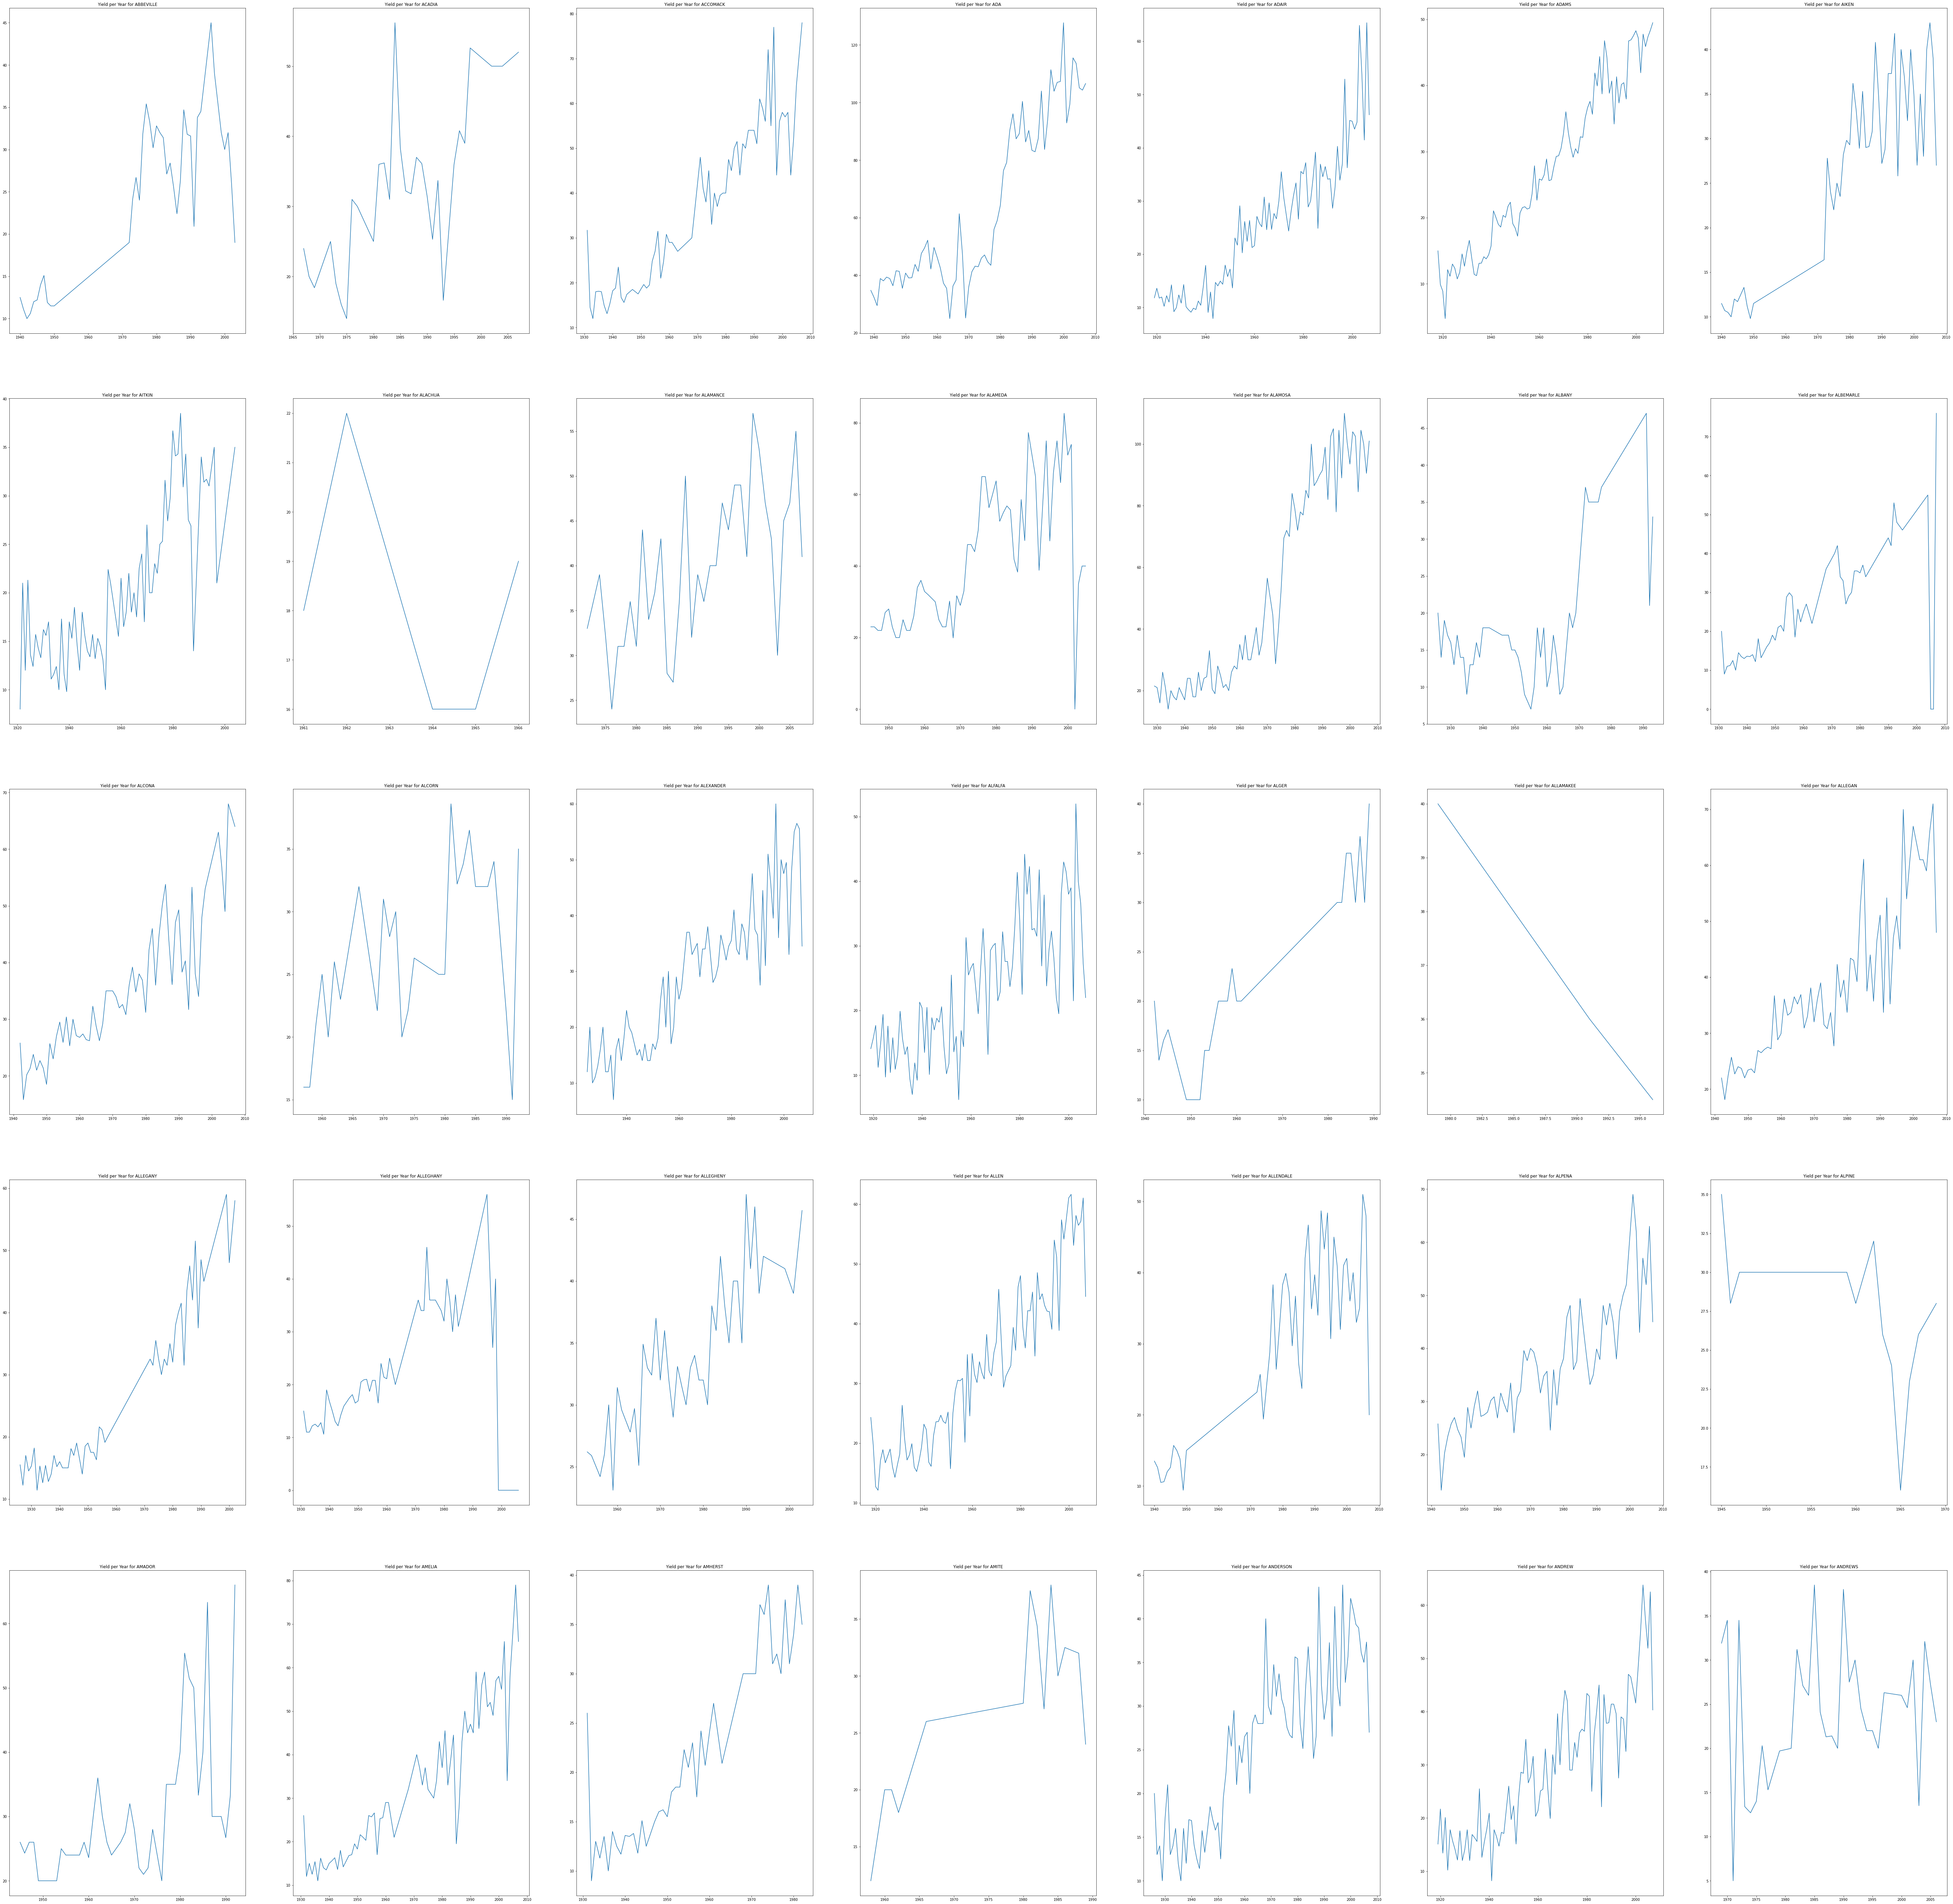

In [85]:
fig = plt.figure(figsize=(100,100))

pos = 1
for county in numpy.unique(aggregated_yield_per_year_per_county["County"].values):

  byCounty = aggregated_yield_per_year_per_county[ aggregated_yield_per_year_per_county["County"] == county ]
  ax = fig.add_subplot( 5, 7, pos )
  ax.title.set_text(f"Yield per Year for {county}")
  ax.plot( byCounty["Year"], byCounty["Value"] )
  pos+=1
  
plt.show()


### Value per Year

First, we need to group values by year

In [86]:
df_value_per_year = df.groupby(["Year"]).Value.mean().reset_index()
df_value_per_year.head()

Year      Value
0  1918  17.904545
1  1919  13.120096
2  1920  12.590674
3  1921  11.213800
4  1922  13.052542

Next, we plot the years in the x axis and wheat yield values on the y axis

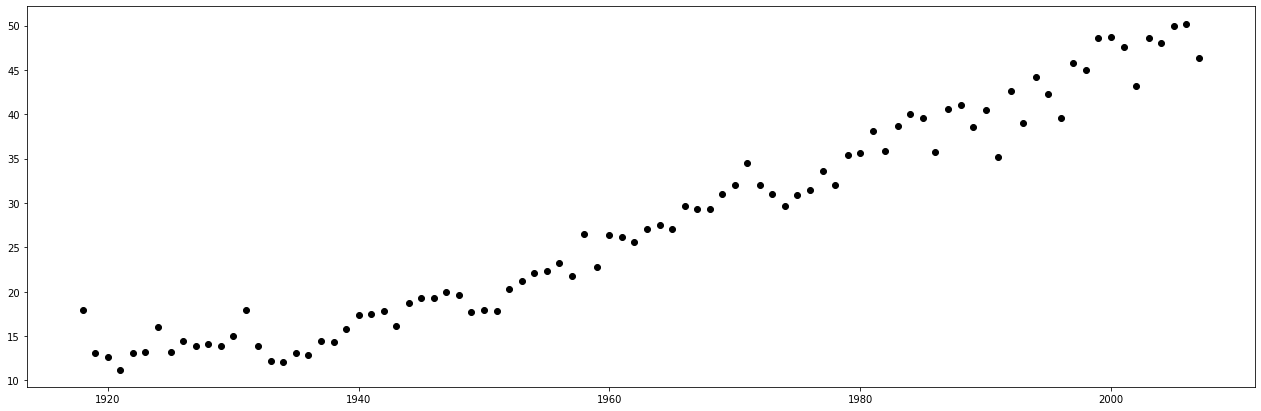

In [87]:
plt.figure(figsize=(22,7))
plt.plot(df_value_per_year.Year, df_value_per_year.Value, 'o', color='black');
plt.show()

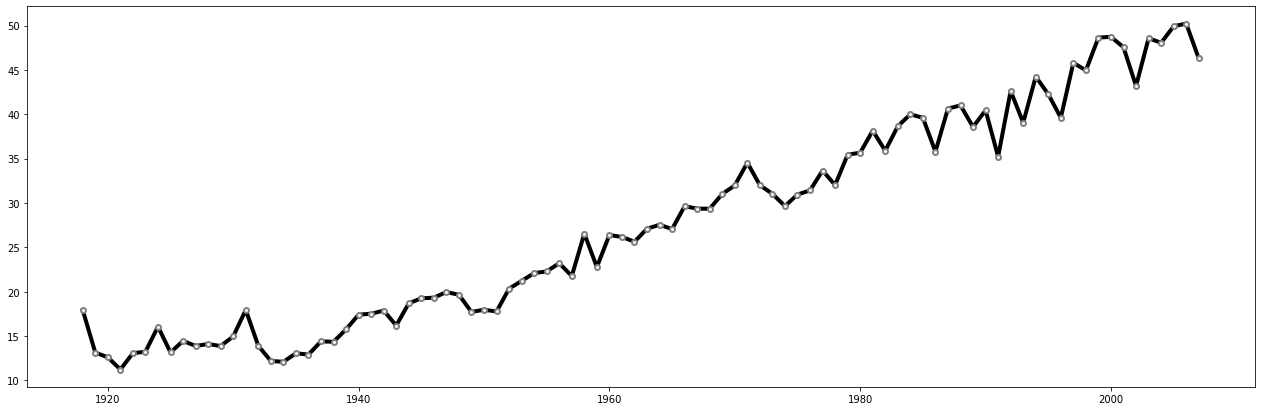

In [88]:
plt.figure(figsize=(22,7))
plt.plot(df_value_per_year.Year, df_value_per_year.Value, '-ok',color='black',
         markersize=5, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

##Ancillary Data 

We searched through possible factors that might affect wheat growth over the years and are going to analyze them below to see the correlations between these external factors and the increase of wheat growth as time passes, as well as the factors that might be affecting the yield of wheat and why it varies across states.

### Add FIPS Column

We add the county fips code to the data frame.

This will help us merge with other datasets as many of them are defined by fips and not by county.

In [89]:

fipsCodes = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/fips.csv')
fipsCodes["County"] = fipsCodes["County"].str.upper()
fipsCodes

df.assign(FIPS=numpy.nan)

for fips, county, state in fipsCodes.values.tolist():
  df.loc[ (df["County"] == county) & (df["State"] == state), "FIPS" ] = fips

df.reset_index(inplace=True)
df

index  Year     State  State ANSI  ... Zip Code  Region Value     FIPS
0           0  1939  COLORADO           8  ...      NaN     NaN  11.5   8001.0
1           1  1939  COLORADO           8  ...      NaN     NaN  10.0   8005.0
2           2  1939  COLORADO           8  ...      NaN     NaN   5.0   8017.0
3           3  1939  COLORADO           8  ...      NaN     NaN  14.0   8035.0
4           4  1939  COLORADO           8  ...      NaN     NaN   8.0   8041.0
...       ...   ...       ...         ...  ...      ...     ...   ...      ...
151763  36801  1990   WYOMING          56  ...      NaN     NaN  27.4  56015.0
151764  36802  1990   WYOMING          56  ...      NaN     NaN  31.1  56021.0
151765  36803  1990   WYOMING          56  ...      NaN     NaN  23.2  56027.0
151766  36804  1990   WYOMING          56  ...      NaN     NaN  26.9  56031.0
151767  36805  1990   WYOMING          56  ...      NaN     NaN  25.0  56023.0

[151768 rows x 12 columns]

### Soil Data



Soil composition is a very important component in the field of agriculture as it heavily impact plant development.

There are a couple of very important attributes that play a role in this:

- Amount of Sand (%)
- Amount of Silt (%)
- Amount of Clay (%)
- Organic Matter: Amount of organic material
- Soil pH: Acidity of the soil
- Slope
- KW & KF Factor: Suseptible the soil to sheet and rill erosion (g.e. rain & runoff)
- T Factor: Estimate of annual rate of soil loss

Of course there are many more soil characteristics that affecs plant growth, howerver those are enough for now.




In [90]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt

from IPython.display import HTML, display
import tabulate

from sklearn.linear_model import LinearRegression


We load the datasets.

You may have noticed that the only records available are for the years: 1992, 2001, 2006, and 2011

However, this is okay as the soil composition does not change a lot in a couple year, it usually takes a little more time.

As such we can study the evolution of soils without having data for each year


In [91]:
# df1 = pandas.read_csv (r'data\soil1992.csv')
# df2 = pandas.read_csv (r'data\soil2001.csv')
# df3 = pandas.read_csv (r'data\soil2006.csv')
# df4 = pandas.read_csv (r'data\soil2011.csv')

df1 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/soil1992.csv')
df2 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/soil2001.csv')
df3 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/soil2006.csv')
df4 = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/soil2011.csv')

columns = df1.columns[1:].values

df1.columns = numpy.concatenate([["stco"], (df1.columns[1:].values + "1992")])
df2.columns = numpy.concatenate([["stco"], (df2.columns[1:].values + "2001")])
df3.columns = numpy.concatenate([["stco"], (df3.columns[1:].values + "2006")])
df4.columns = numpy.concatenate([["stco"], (df4.columns[1:].values + "2011")])

df_soil = df1.merge(df2, how='left', on='stco')
df_soil = df_soil.merge(df3, how='left', on='stco')
df_soil = df_soil.merge(df4, how='left', on='stco')

df_soil

stco    whc1992   sand1992  ...   spH2011   slope2011  tfactor2011
0      1001  24.783429  59.681402  ...  5.131809   51.096452     4.958062
1      1003  23.538841  59.091992  ...  4.940920  108.040514     4.948877
2      1005  21.483670  61.744352  ...  5.120601   66.746911     4.922988
3      1007  25.890773  50.707970  ...  4.967788   41.091446     4.854160
4      1009  18.282575  37.500558  ...  4.916741   31.243837     3.106725
...     ...        ...        ...  ...       ...         ...          ...
3065  56037  14.367646  69.070912  ...  7.912949   40.801850     3.262764
3066  56039  15.435892  56.366681  ...  7.386237         NaN     3.741577
3067  56041  14.455931  69.503138  ...  7.973075   64.047458     3.174600
3068  56043  22.696846  35.084727  ...  8.375702         NaN     4.767428
3069  56045  21.376395  33.878523  ...  8.202927   52.123506     4.720689

[3070 rows x 41 columns]


We start out by looking at the means over the years per county.


In [92]:
cols = []

for c in columns: 
    cols.append(c + "_mean")
    df_soil[c+"_mean"] = df_soil[[c+"1992", c+"2001", c+"2006", c+"2011"]].mean(axis=1)
    
df_soil[cols].describe()

whc_mean    sand_mean  ...   slope_mean  tfactor_mean
count  3070.000000  3070.000000  ...  2935.000000   3070.000000
mean     23.837803    36.765657  ...    61.694291      4.346521
std       5.744237    19.433031  ...    44.585361      0.545190
min       3.229838     4.218232  ...     1.556971      1.203383
25%      19.856663    20.697222  ...    41.593706      4.025074
50%      23.531472    34.554205  ...    54.677555      4.488395
75%      27.520429    48.995892  ...    67.829541      4.790743
max      42.125877    95.785981  ...   842.997444      5.000000

[8 rows x 10 columns]


This does not really give us a lot of information.

We then look at the variance over the years per county


In [93]:
cols = []

for c in columns: 
    cols.append(c + "_var")
    df_soil[c+"_var"] = df_soil[[c+"1992", c+"2001", c+"2006", c+"2011"]].var(axis=1)    

df_soil[cols].describe()

whc_var     sand_var  ...     slope_var  tfactor_var
count  3064.000000  3064.000000  ...   2917.000000  3064.000000
mean      0.446717     1.396923  ...     12.102757     0.007453
std       3.268713     9.027061  ...    249.837207     0.066063
min       0.000000     0.000000  ...      0.000000     0.000000
25%       0.002830     0.010636  ...      0.008162     0.000019
50%       0.018630     0.062963  ...      0.087885     0.000155
75%       0.105727     0.380407  ...      0.737043     0.001007
max      74.762506   319.681883  ...  11889.222364     2.282243

[8 rows x 10 columns]


This gives us a lot of information regarding our preconceived idea that there is not much variations in soil types over shorter period of times.

As we can see the mean variance is very low compared the mean of means seen above.

This tells that there was not much change over the years in the composition of the soils.

To examplify even more this concept, we decide the show that there is not much variation between 1992 - 2011 (19 years)


In [94]:
cols = []

for c in columns: 
    cols.append(c + "_diff")
    df_soil[c+"_diff"] = (df_soil[c+"2006"] - df_soil[c+"1992"])

    
df_soil[cols].describe()

whc_diff    sand_diff  ...   slope_diff  tfactor_diff
count  3060.000000  3060.000000  ...  2912.000000   3060.000000
mean      0.303630    -0.307189  ...     0.458057      0.029794
std       1.276231     2.315692  ...     6.967379      0.167944
min     -10.163149   -20.697084  ...  -223.535578     -1.698558
25%      -0.085904    -0.719266  ...    -0.144337     -0.009955
50%       0.108461    -0.169821  ...     0.180036      0.006910
75%       0.460836     0.212972  ...     1.038165      0.038054
max      17.157488    35.734837  ...   131.033633      3.021419

[8 rows x 10 columns]

In [95]:
df_soil = df_soil.dropna()
print(len(df_soil["stco"]), len(df_soil["stco"].unique()))

2910 2910


Now that we have established this, it would be intersting to be able to fit a line over the years per county.

We do that below:

In [96]:
model = LinearRegression()

coef = pandas.DataFrame()
itcp = pandas.DataFrame()
rval = pandas.DataFrame()

for c in columns:
    
    col_coef = []
    col_itcp = []
    col_rval = []
    
    for i in range(len(df_soil)):
        
        X = numpy.array([1992, 2001, 2006, 2011])
        Y = df_soil[[c+"1992", c+"2001", c+"2006", c+"2011"]].iloc[i]
        
        model.fit( X.reshape(-1, 1), Y.values )
        
        col_coef.append(model.coef_[0])
        col_itcp.append(model.intercept_)
        col_rval.append(model.score(X.reshape(-1, 1), Y))
        
    df_soil[c + "_coef"] = col_coef
    df_soil[c + "_itcp"] = col_itcp
    df_soil[c + "_rval"] = col_rval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [97]:
df_soil

stco    whc1992   sand1992  ...  tfactor_coef  tfactor_itcp  tfactor_rval
0      1001  24.783429  59.681402  ...      0.000401      4.152543      0.985285
1      1003  23.538841  59.091992  ...      0.000680      3.583339      0.859604
2      1005  21.483670  61.744352  ...     -0.000165      5.254847      0.708793
3      1007  25.890773  50.707970  ...     -0.000365      5.588153      0.913250
4      1009  18.282575  37.500558  ...     -0.003631     10.395645      0.739522
...     ...        ...        ...  ...           ...           ...           ...
3063  56033  22.216544  39.018495  ...      0.006730     -8.900667      0.714284
3064  56035  19.142395  64.551308  ...      0.000219      3.047987      0.157417
3065  56037  14.367646  69.070912  ...     -0.016124     35.627888      0.747574
3067  56041  14.455931  69.503138  ...     -0.005079     13.369436      0.758687
3069  56045  21.376395  33.878523  ...      0.023977    -43.410517      0.720935

[2910 rows x 101 columns]

In [98]:
df_soil[columns+"_coef"].describe()

whc_coef    sand_coef  ...   slope_coef  tfactor_coef
count  2910.000000  2910.000000  ...  2910.000000   2910.000000
mean      0.015574    -0.016657  ...     0.024307      0.001445
std       0.065833     0.121963  ...     0.366528      0.008211
min      -0.547514    -1.187645  ...   -12.054963     -0.090532
25%      -0.004384    -0.038202  ...    -0.007913     -0.000488
50%       0.005629    -0.009359  ...     0.009551      0.000380
75%       0.024107     0.010267  ...     0.055098      0.001986
max       0.916708     1.906939  ...     6.961457      0.121931

[8 rows x 10 columns]

In [99]:
df_soil[columns+"_rval"].describe()

whc_rval    sand_rval  ...   slope_rval  tfactor_rval
count  2910.000000  2910.000000  ...  2910.000000   2910.000000
mean      0.697211     0.696669  ...     0.715173      0.705899
std       0.188122     0.192848  ...     0.181882      0.181384
min       0.000002     0.000087  ...     0.000005      0.000249
25%       0.687606     0.678128  ...     0.698586      0.691031
50%       0.743905     0.744374  ...     0.745364      0.744055
75%       0.782213     0.786329  ...     0.788981      0.785888
max       0.998551     0.996774  ...     1.000000      1.000000

[8 rows x 10 columns]



As we can see the average coeficient of change in the regression of all these records is very low.

This adds to our conclusion of slow change over time.

We also show that the passage of time seems to account on average for 70% of the change in each column.

Of course time encompases many effects, but what we would like to show, is that by going back in time and imputing values for each of those columns on years is acceptable.

What we do next, is create a column in our original dataset for each of the components in our soil dataset.

We then impute into each of those newly created columns values estimated by the linear regression generated for each county.



In [100]:

df_soil = df_soil[["stco"] + (columns + "_coef").tolist() + (columns + "_itcp").tolist()]
df_soil = df_soil.reset_index()

for col in columns:
    df[col] = numpy.nan

for fips in df_soil["stco"].values:
  
  yr = df.loc[ df["FIPS"] == fips, "Year" ].values
  yr = yr.reshape( len(yr), 1 )
  
  coef = df_soil.loc[ df_soil["stco"] == fips, columns+"_coef"].values[0]
  coef = coef.reshape(1, len(coef))

  itcp = df_soil.loc[ df_soil["stco"] == fips, columns+"_itcp"].values[0]
  itcp = itcp.reshape(1, len(itcp))

  

  df.loc[ df["FIPS"] == fips, columns ] = numpy.matmul(yr, coef) + itcp

df                                                              

index  Year     State  ...       spH      slope   tfactor
0           0  1939  COLORADO  ...  7.957254  80.425008  4.708308
1           1  1939  COLORADO  ...  7.733126  88.547444  4.145389
2           2  1939  COLORADO  ...  7.961142  70.745841  4.881807
3           3  1939  COLORADO  ...       NaN        NaN       NaN
4           4  1939  COLORADO  ...  7.175293  62.072581  3.830624
...       ...   ...       ...  ...       ...        ...       ...
151763  36801  1990   WYOMING  ...  8.060554  70.543896  4.617785
151764  36802  1990   WYOMING  ...       NaN        NaN       NaN
151765  36803  1990   WYOMING  ...  7.553314  72.448355  4.424395
151766  36804  1990   WYOMING  ...       NaN        NaN       NaN
151767  36805  1990   WYOMING  ...  7.789323  52.521581  4.046118

[151768 rows x 22 columns]

In [101]:
df_soil[df_soil["stco"] == 8001]

index  stco  whc_coef  ...  spH_itcp  slope_itcp  tfactor_itcp
200    215  8001 -0.006177  ...  8.273574    3.365073      6.676547

[1 rows x 22 columns]

###Agricultural Land 


In [102]:
df_land= pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/AgricuturalLand.csv')

In [103]:
df_land.head()

NAME       date     value
0  usa.ag.lnd.agri.zs  6/15/1961  48.86024
1  usa.ag.lnd.agri.zs  6/15/1962  48.47614
2  usa.ag.lnd.agri.zs  6/15/1963  48.19794
3  usa.ag.lnd.agri.zs  6/15/1964  47.93252
4  usa.ag.lnd.agri.zs  6/15/1965  47.58979

In [104]:
date= df_land['date'].values
date

array(['6/15/1961', '6/15/1962', '6/15/1963', '6/15/1964', '6/15/1965',
       '6/15/1966', '6/15/1967', '6/15/1968', '6/15/1969', '6/15/1970',
       '6/15/1971', '6/15/1972', '6/15/1973', '6/15/1974', '6/15/1975',
       '6/15/1976', '6/15/1977', '6/15/1978', '6/15/1979', '6/15/1980',
       '6/15/1981', '6/15/1982', '6/15/1983', '6/15/1984', '6/15/1985',
       '6/15/1986', '6/15/1987', '6/15/1988', '6/15/1989', '6/15/1990',
       '6/15/1991', '6/15/1992', '6/15/1993', '6/15/1994', '6/15/1995',
       '6/15/1996', '6/15/1997', '6/15/1998', '6/15/1999', '6/15/2000',
       '6/15/2001', '6/15/2002', '6/15/2003', '6/15/2004', '6/15/2005',
       '6/15/2006', '6/15/2007', '6/15/2008', '6/15/2009', '6/15/2010',
       '6/15/2011', '6/15/2012', '6/15/2013', '6/15/2014', '6/15/2015',
       '6/15/2016', '6/15/2017', '6/15/2018'], dtype=object)

In [105]:
for i in range(len(date)):
  date[i]=date[i][5:9]
  #print(date[i])
date

array(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'], dtype=object)

In [106]:
df_land['date']=date
df_land.head()

NAME  date     value
0  usa.ag.lnd.agri.zs  1961  48.86024
1  usa.ag.lnd.agri.zs  1962  48.47614
2  usa.ag.lnd.agri.zs  1963  48.19794
3  usa.ag.lnd.agri.zs  1964  47.93252
4  usa.ag.lnd.agri.zs  1965  47.58979

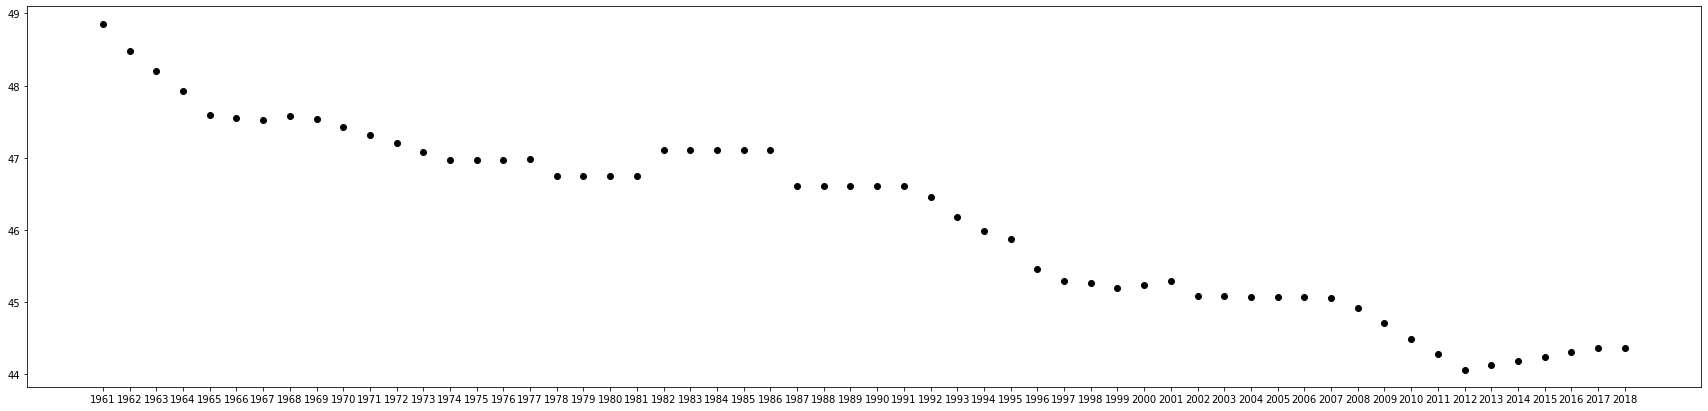

In [107]:
plt.figure(figsize=(30,7))
plt.plot(df_land.date, df_land.value, 'o', color='black');
plt.show()

In [108]:
uniqueval= df_land['date'].unique()
print("There are", len(uniqueval), "unique values.")
min= df_land['date'].min()
max= df_land['date'].max()
print("The years range from", max, "to", min, "so no years are missing between 1961 and 2018")

There are 58 unique values.
The years range from 2018 to 1961 so no years are missing between 1961 and 2018


In [109]:
df_value_per_year.head()

Year      Value
0  1918  17.904545
1  1919  13.120096
2  1920  12.590674
3  1921  11.213800
4  1922  13.052542

In our dataset, the years range from 1918 to 2007, and so the overlapping years in both datasets are 1961 to 2007. 
We will use this range of data to observe possible trends. 

In [110]:
df_subset_1= df_value_per_year[df_value_per_year["Year"]>1960]
df_subset_1['Year'].unique()
df_subset_1.head()

Year      Value
43  1961  26.161353
44  1962  25.619072
45  1963  27.088641
46  1964  27.537563
47  1965  27.044740

In [111]:
df_subset_2= df_land[0:47]
#df_subset_2.tail()
df_subset_2['date'].unique()
df_subset_2.head()

NAME  date     value
0  usa.ag.lnd.agri.zs  1961  48.86024
1  usa.ag.lnd.agri.zs  1962  48.47614
2  usa.ag.lnd.agri.zs  1963  48.19794
3  usa.ag.lnd.agri.zs  1964  47.93252
4  usa.ag.lnd.agri.zs  1965  47.58979

In [112]:
val_land= df_subset_2['value'].values
val_land

array([48.86024, 48.47614, 48.19794, 47.93252, 47.58979, 47.55453,
       47.52799, 47.58128, 47.54328, 47.42897, 47.30886, 47.19968,
       47.07958, 46.96581, 46.96581, 46.96581, 46.9847 , 46.74799,
       46.74799, 46.74799, 46.74799, 47.10131, 47.10131, 47.10131,
       47.10131, 47.10131, 46.61534, 46.61534, 46.61534, 46.61534,
       46.61534, 46.44949, 46.17861, 45.98109, 45.87191, 45.45341,
       45.29827, 45.26584, 45.1893 , 45.23058, 45.29007, 45.08487,
       45.08032, 45.0758 , 45.0713 , 45.06684, 45.06235])

In [113]:
df_subset_1['val_land']=val_land
df_subset_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year      Value  val_land
43  1961  26.161353  48.86024
44  1962  25.619072  48.47614
45  1963  27.088641  48.19794
46  1964  27.537563  47.93252
47  1965  27.044740  47.58979

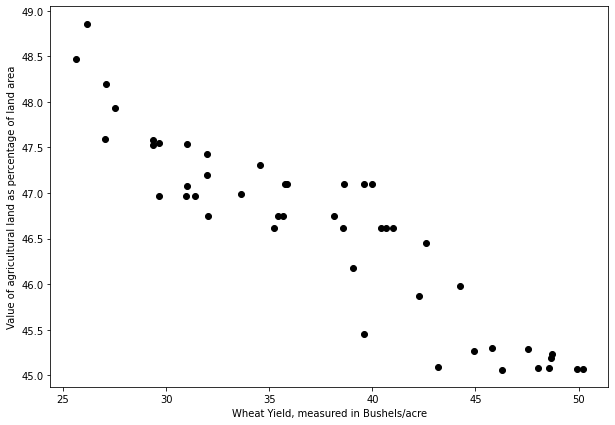

In [114]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Value, df_subset_1.val_land, 'o', color='black')
plt.xlabel("Wheat Yield, measured in Bushels/acre")
plt.ylabel("Value of agricultural land as percentage of land area")
plt.show()

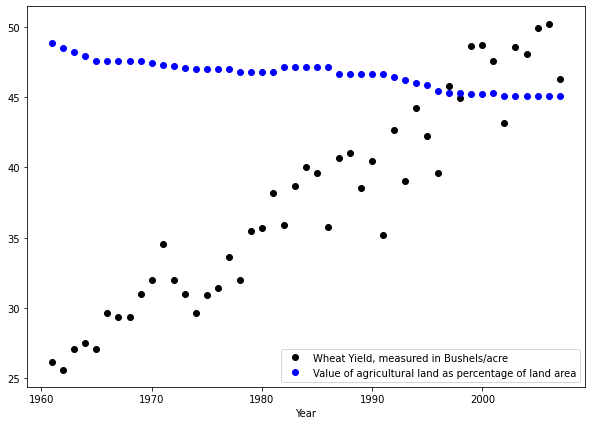

In [115]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Year, df_subset_1.Value, 'o', color='black', label='Wheat Yield, measured in Bushels/acre')
plt.plot(df_subset_1.Year, df_subset_1.val_land, 'o', color='blue', label='Value of agricultural land as percentage of land area')
#plt.xlabel("Wheat Yield, measured in Bushels/acre")
plt.xlabel("Year")
plt.legend(loc='best')
plt.show()

Here, we observe an inverse correlation between the wheat yield and the value of agricultural land as a percentage of total land. 
With time, the value of agricultural land is decreasing, but the yield of what is clearly increasing, despite the less space allocated for agriculture. This may be due to the fact that more technologies are being used or fertilizers to increase crop proiduction, or more percentage of the land for agriclture is allocated towards wheat. 
Below, we will look at how the use of fertilizers and population size are other extrenal factors that affect wheat yield. 

###Fertilizer Consumption


In [116]:
df_fert= pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/Fertilizer_Consumption.csv')
df_fert.head()

symbol     date  FertilizerConsumption
0  usa.ag.con.fert.pt.zs  6/15/61               92.01640
1  usa.ag.con.fert.pt.zs  6/15/62               93.62818
2  usa.ag.con.fert.pt.zs  6/15/63               92.34558
3  usa.ag.con.fert.pt.zs  6/15/64               92.10361
4  usa.ag.con.fert.pt.zs  6/15/65               90.53684

In [117]:
df_fert['date'].unique()

array(['6/15/61', '6/15/62', '6/15/63', '6/15/64', '6/15/65', '6/15/66',
       '6/15/67', '6/15/68', '6/15/69', '6/15/70', '6/15/71', '6/15/72',
       '6/15/73', '6/15/74', '6/15/75', '6/15/76', '6/15/77', '6/15/78',
       '6/15/79', '6/15/80', '6/15/81', '6/15/82', '6/15/83', '6/15/84',
       '6/15/85', '6/15/86', '6/15/87', '6/15/88', '6/15/89', '6/15/90',
       '6/15/91', '6/15/92', '6/15/93', '6/15/94', '6/15/95', '6/15/96',
       '6/15/97', '6/15/98', '6/15/99', '6/15/00', '6/15/01', '6/15/02',
       '6/15/03', '6/15/04', '6/15/05', '6/15/06', '6/15/07', '6/15/08',
       '6/15/09', '6/15/10', '6/15/11', '6/15/12', '6/15/13', '6/15/14',
       '6/15/15', '6/15/16', '6/15/17', '6/15/18'], dtype=object)

In [118]:
val_fert= df_fert['FertilizerConsumption'].values
val_fert=val_fert[0:47]
#len(val_fert)
df_subset_1['FertilizerConsumption']=val_fert
df_subset_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Year      Value  val_land  FertilizerConsumption
43  1961  26.161353  48.86024               92.01640
44  1962  25.619072  48.47614               93.62818
45  1963  27.088641  48.19794               92.34558
46  1964  27.537563  47.93252               92.10361
47  1965  27.044740  47.58979               90.53684

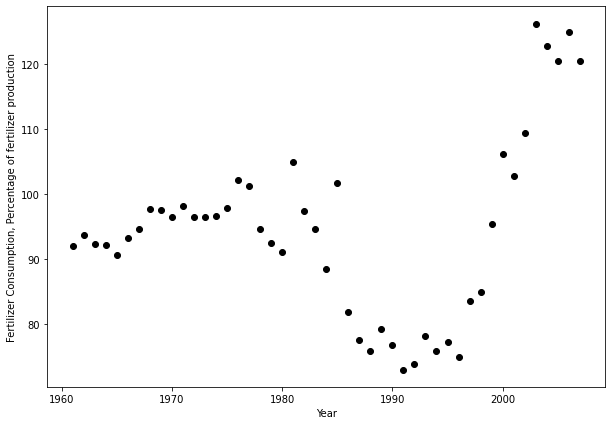

In [119]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Year, df_subset_1.FertilizerConsumption, 'o', color='black')
plt.xlabel("Year")
plt.ylabel("Fertilizer Consumption, Percentage of fertilizer production")
plt.show()

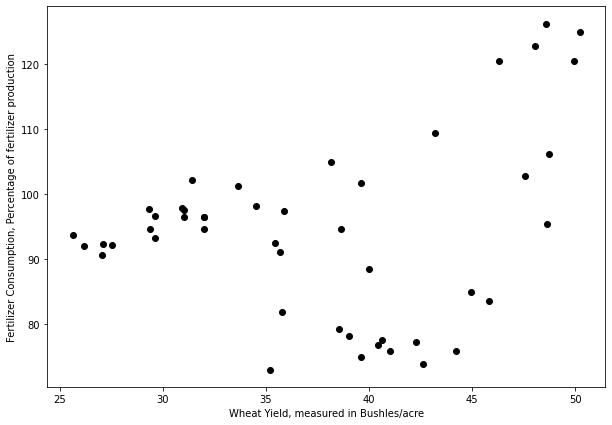

In [120]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Value, df_subset_1.FertilizerConsumption, 'o', color='black')
plt.xlabel("Wheat Yield, measured in Bushles/acre")
plt.ylabel("Fertilizer Consumption, Percentage of fertilizer production")
plt.show()

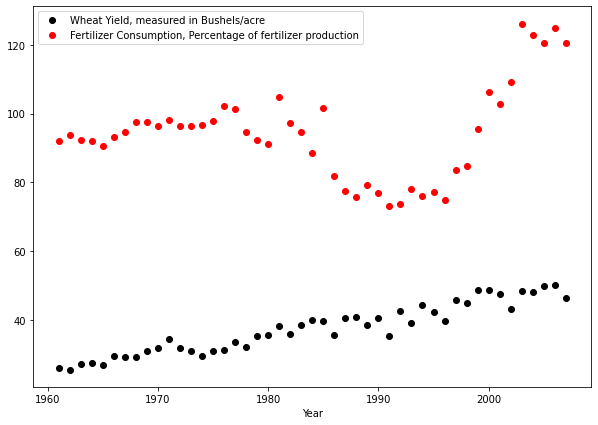

In [121]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Year, df_subset_1.Value, 'o', color='black', label='Wheat Yield, measured in Bushels/acre')
#plt.plot(df_subset_1.Year, df_subset_1.val_land, 'o', color='blue', label='Value of agricultural land as percentage of land area')
plt.plot(df_subset_1.Year, df_subset_1.FertilizerConsumption, 'o', color='red', label='Fertilizer Consumption, Percentage of fertilizer production')
#plt.xlabel("Wheat Yield, measured in Bushels/acre")
plt.xlabel("Year")
plt.legend(loc='best')
plt.show()

We can observe that in recent years, there is an observable trend in the increase of wheat yield and an increase in the percentage of fertilizer produced and thus being used also. 

###Employment in Agriculture

In [122]:
df_agri= pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/Employment_In_Agriculture.csv')
df_agri= df_agri[["date", "value"]]
df_agri.head()
print(df_agri['date'].unique())

['6/15/60' '6/15/61' '6/15/62' '6/15/63' '6/15/64' '6/15/65' '6/15/66'
 '6/15/67' '6/15/68' '6/15/69' '6/15/70' '6/15/71' '6/15/72' '6/15/73'
 '6/15/74' '6/15/75' '6/15/76' '6/15/77' '6/15/78' '6/15/79' '6/15/80'
 '6/15/81' '6/15/82' '6/15/83' '6/15/84' '6/15/85' '6/15/86' '6/15/87'
 '6/15/88' '6/15/89' '6/15/90' '6/15/91' '6/15/92' '6/15/93' '6/15/94'
 '6/15/95' '6/15/96' '6/15/97' '6/15/98' '6/15/99' '6/15/00' '6/15/01'
 '6/15/02' '6/15/03' '6/15/04' '6/15/05' '6/15/06' '6/15/07' '6/15/08'
 '6/15/09' '6/15/10' '6/15/11' '6/15/12' '6/15/13' '6/15/14' '6/15/15'
 '6/15/16' '6/15/17' '6/15/18' '6/15/19' '6/15/20' nan]


In [123]:
val_agri= df_agri['value'].values
val_agri=val_agri[1:48]
#len(val_fert)
df_subset_1['AgriEmployment']=val_agri
df_subset_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Year      Value  val_land  FertilizerConsumption  AgriEmployment
43  1961  26.161353  48.86024               92.01640            7.91
44  1962  25.619072  48.47614               93.62818            7.41
45  1963  27.088641  48.19794               92.34558            6.92
46  1964  27.537563  47.93252               92.10361            6.53
47  1965  27.044740  47.58979               90.53684            6.13

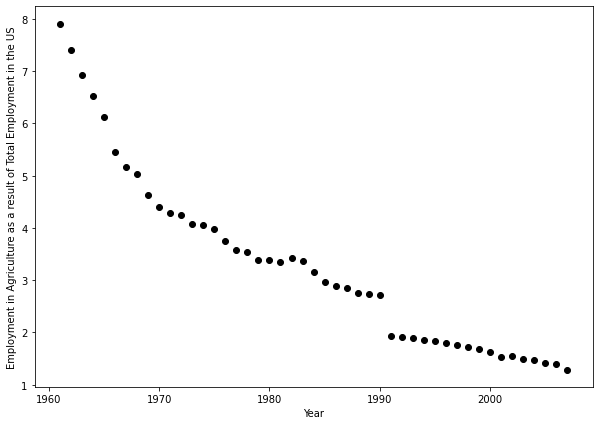

In [124]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Year, df_subset_1.AgriEmployment, 'o', color='black')
plt.xlabel("Year")
plt.ylabel("Employment in Agriculture as a result of Total Employment in the US")
plt.show()

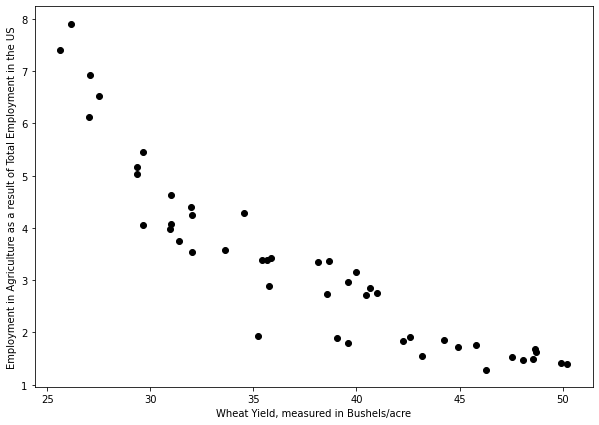

In [125]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Value, df_subset_1.AgriEmployment, 'o', color='black')
plt.xlabel("Wheat Yield, measured in Bushels/acre")
plt.ylabel("Employment in Agriculture as a result of Total Employment in the US")
plt.show()

We observe a decrease in the Employment in Agriculture as a result of the total employment in the US. 

Despite growing numbers for wheat yield, a decrease in employment may not be a reflective factor leadinf to the increase of yield. This may imply a decrease in the agriculture employment as a result to increased use of agri-technologies that facilitate the agriculturakl process and more efficiently grow crops, in our case wheat. 

###Population Growth

In [126]:
df_pop= pandas.read_csv(r'/content/drive/My Drive/CMPS_276/data/Population_Growth.csv')
df_pop.head()
#print(df_pop['date'].unique())

symbol     date    value
0  usa.sp.pop.grow  6/15/60  1.70199
1  usa.sp.pop.grow  6/15/61  1.65773
2  usa.sp.pop.grow  6/15/62  1.53800
3  usa.sp.pop.grow  6/15/63  1.43916
4  usa.sp.pop.grow  6/15/64  1.38905

In [127]:
val_pop= df_pop['value'].values
val_pop=val_pop[1:48]
df_subset_1['PopulationGrowth']=val_pop
df_subset_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Year      Value  ...  AgriEmployment  PopulationGrowth
43  1961  26.161353  ...            7.91           1.65773
44  1962  25.619072  ...            7.41           1.53800
45  1963  27.088641  ...            6.92           1.43916
46  1964  27.537563  ...            6.53           1.38905
47  1965  27.044740  ...            6.13           1.25017

[5 rows x 6 columns]

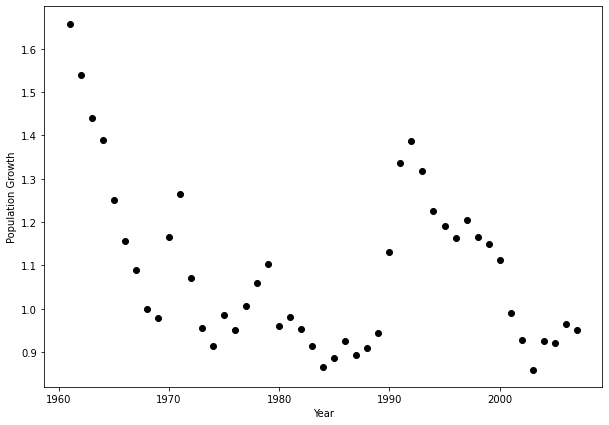

In [128]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Year, df_subset_1.PopulationGrowth, 'o', color='black')
plt.xlabel("Year")
plt.ylabel("Population Growth")
plt.show()

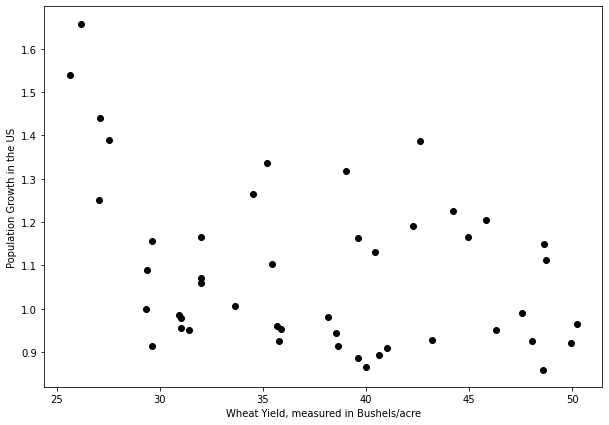

In [129]:
plt.figure(figsize=(10,7))
plt.plot(df_subset_1.Value, df_subset_1.PopulationGrowth, 'o', color='black')
plt.xlabel("Wheat Yield, measured in Bushels/acre")
plt.ylabel("Population Growth in the US")
plt.show()

### Precipitation Data

Precipitation data per county per month from 1895 to 2021. The values represent monthly precipitation (in inches) for every county from January to December for the years 1985 yo 2021. Missing data is encoded as -9.99. FIPS is a 5-digit unique identifier for every county. Digits 1-2 represent the states. Digits 3 to 5 represent the county, range of values 001-999.

In [130]:
df_precipitation = pandas.read_csv("/content/drive/My Drive/CMPS_276/data/FIXED_FIPS_Precipitation_Data_PerMonth_1895to2020.csv")
print(df_precipitation.head())

   State and County  ...  ID_precipitation
0              1001  ...          18951001
1              1001  ...          18961001
2              1001  ...          18971001
3              1001  ...          18981001
4              1001  ...          18991001

[5 rows x 16 columns]


the "code(1_indicates_precipitation_values)" indicates that precipitation is being measured (code 1), therefore it can be dropped, also after seeing that is has 0 variance. Calculating its variance is unnecessary, since this column is just meta data.

In [131]:
print(df_precipitation['code(1_indicates_precipitation_values)'].std()**2)
df_precipitation = df_precipitation.drop(columns=['code(1_indicates_precipitation_values)'])
print(df_precipitation.head())

0.0
   State and County  Year  January  ...  November  December  ID_precipitation
0              1001  1895     7.03  ...      1.44      3.66          18951001
1              1001  1896     5.86  ...      2.89      1.94          18961001
2              1001  1897     3.27  ...      1.84      4.38          18971001
3              1001  1898     2.33  ...      6.66      3.91          18981001
4              1001  1899     5.80  ...      1.98      5.25          18991001

[5 rows x 15 columns]


In [132]:
df_precipitation = df_precipitation.rename(columns={'ID_precipitation': 'ID'})
df_precipitation.head()

State and County  Year  January  ...  November  December        ID
0              1001  1895     7.03  ...      1.44      3.66  18951001
1              1001  1896     5.86  ...      2.89      1.94  18961001
2              1001  1897     3.27  ...      1.84      4.38  18971001
3              1001  1898     2.33  ...      6.66      3.91  18981001
4              1001  1899     5.80  ...      1.98      5.25  18991001

[5 rows x 15 columns]

In [133]:
#let's find missing values
df_precipitation_missing = df_precipitation[df_precipitation.eq(-9.99).any(1)]
#let's see in what years are the current missing values
print(df_precipitation_missing["Year"].unique())

[2021]


Missing values are only in 2021, therefore, we can drop this year because we are looking for years 1920 to 2007. 

In [134]:
df_precipitation = df_precipitation[df_precipitation['Year'] != 2021]
df_precipitation["Year"].max()

2020

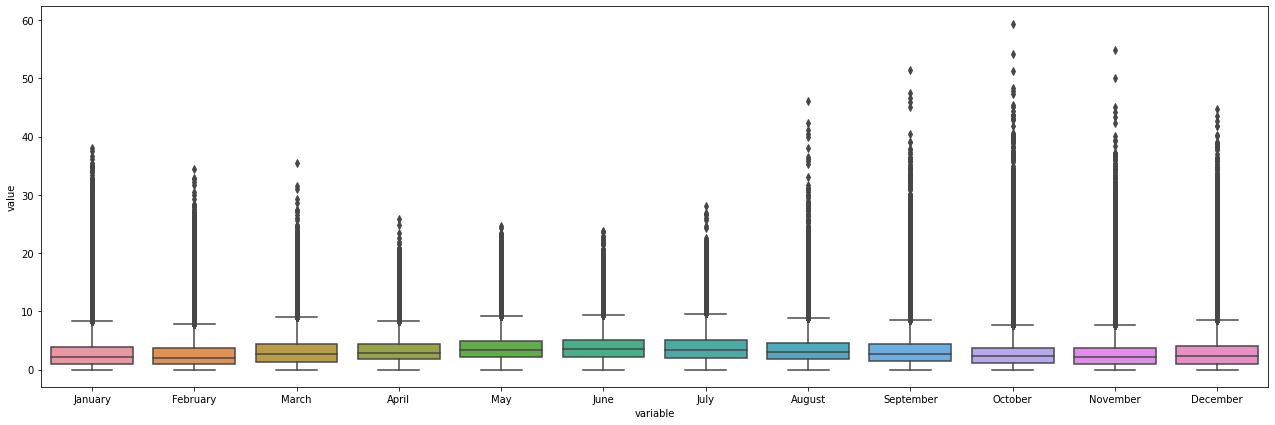

In [135]:
import seaborn as sns
#boxplot
plt.figure(figsize=(22,7))
sns.boxplot(x="variable", y="value", data=pandas.melt(df_precipitation.drop(columns=['ID', "Year", "State and County"])))
plt.show()

Are the outliers really "outliers"?
in an article titled "60 inches of rain fell from Hurricane Harvey in Texas, shattering U.S. storm record": “The 3-to-4 day rainfall totals of greater than 40 inches (possible 50 inches in locations surrounding Santa Fe and Dickinson) are simply mind-blowing that has lead to the largest flood in Houston-Galveston history,” the National Weather Service office serving Houston wrote.
source:
https://www.washingtonpost.com/news/capital-weather-gang/wp/2017/08/29/harvey-marks-the-most-extreme-rain-event-in-u-s-history/

Therefore, it is possible to have 60 inches of monthly precipitations, since a hurricane in texas produced 40 inches of rain in 3 to 4 days in 2017.

<Figure size 1584x504 with 0 Axes>

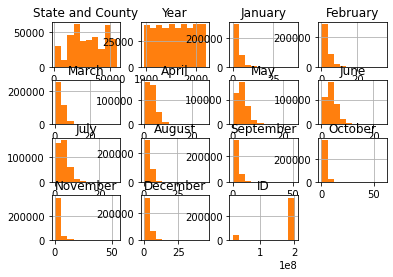

In [136]:
plt.figure(figsize=(22,7))
axs = df_precipitation.hist()
for ax, (colname, values) in zip(axs.flat, df_precipitation.iteritems()):
    values.hist(ax=ax, bins=10)

Now let's calculate the precipitation value per year, and plot its variation over the years

In [137]:
df_precipitation_values = df_precipitation.drop(columns=['ID', "Year", "State and County"])
print(df_precipitation_values.describe())
#we now take the sum of the monthly precipitations to get the yearly precipitations, and add it as a column at the end of the dataset
df_precipitation["Sum_over_the_year"]=df_precipitation_values.sum(axis = 1, skipna = True)
df_precipitation.head()

             January       February  ...       November       December
count  394266.000000  394266.000000  ...  394266.000000  394266.000000
mean        2.766157       2.609559  ...       2.717821       2.890502
std         2.645160       2.346667  ...       2.462012       2.658110
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.860000       0.900000  ...       1.030000       0.990000
50%         2.110000       2.000000  ...       2.190000       2.300000
75%         3.850000       3.640000  ...       3.700000       3.990000
max        38.040000      34.450000  ...      54.800000      44.760000

[8 rows x 12 columns]


State and County  Year  January  ...  December        ID  Sum_over_the_year
0              1001  1895     7.03  ...      3.66  18951001              46.38
1              1001  1896     5.86  ...      1.94  18961001              45.07
2              1001  1897     3.27  ...      4.38  18971001              44.39
3              1001  1898     2.33  ...      3.91  18981001              42.34
4              1001  1899     5.80  ...      5.25  18991001              44.13

[5 rows x 16 columns]

In [138]:
#average precipitation in the USA per year (over all the counties)
df_precipitation_per_year = df_precipitation.groupby(["Year"]).Sum_over_the_year.mean().reset_index()
df_precipitation_per_year.head()


Year  Sum_over_the_year
0  1895          33.853840
1  1896          36.189057
2  1897          36.569417
3  1898          39.015758
4  1899          35.403389

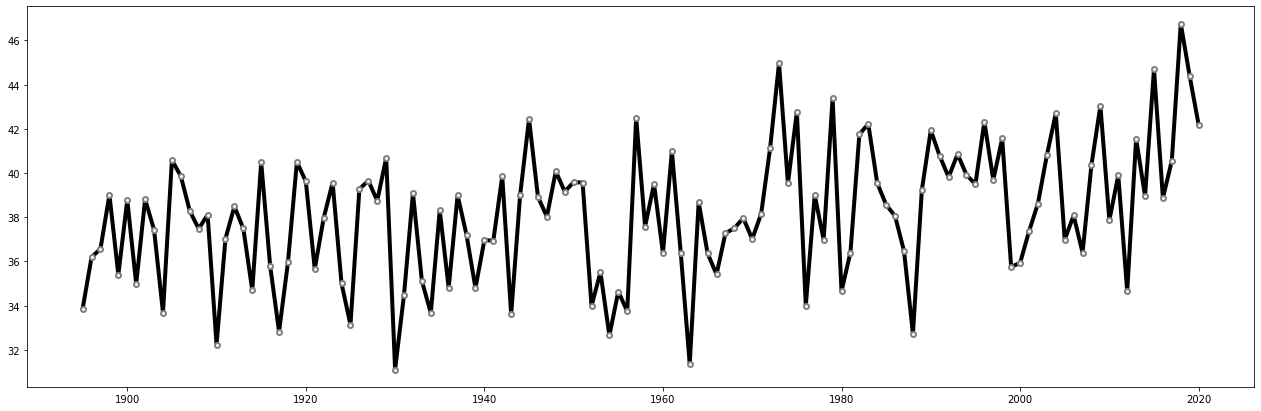

In [139]:

#Now plotting Yearly Precipitation data:

plt.figure(figsize=(22,7))
plt.plot(df_precipitation_per_year.Year, df_precipitation_per_year.Sum_over_the_year, '-ok',color='black',
         markersize=5, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

### Temperature Data

Temperature data per county per month from 1895 to 2021. The values represent average temperature in Degrees Farenheit for every county from January to December for the years 1985 yo 2021. Missing data is encoded as -99.99. FIPS is a 5-digit unique identifier for every county. Digits 1-2 represent the states. Digits 3 to 5 represent the county, range of values 001-999.

In [140]:
df_temperature = pandas.read_excel("/content/drive/My Drive/CMPS_276/data/Temperature_Data_1895to2021.xlsx")
print(df_temperature.describe())

                FIPS  Temperature code  ...       November       December
count  397402.000000          397402.0  ...  397402.000000  397402.000000
mean    25058.154290               2.0  ...      42.674133      33.444635
std     13822.594289               0.0  ...      16.112234      16.699450
min      1001.000000               2.0  ...     -99.900000     -99.900000
25%     13057.000000               2.0  ...      36.900000      26.300000
50%     24001.000000               2.0  ...      43.700000      34.500000
75%     39039.000000               2.0  ...      50.700000      42.800000
max     50290.000000               2.0  ...      79.200000      77.600000

[8 rows x 15 columns]


the Temperature code column indicates that temperature is being measured (code 2), therefore it can be dropped, also after seeing that is has 0 variance. Calculating its variance is unnecessary, since this column is just meta data.

In [141]:
print(df_temperature['Temperature code'].std()**2)
df_temperature = df_temperature.drop(columns=['Temperature code'])
print(df_temperature.head())

0.0
   FIPS  Year  January  February  ...  September  October  November  December
0  1001  1895     44.0      38.2  ...       79.0     61.4      54.4      45.3
1  1002  1895     44.0      38.2  ...       79.0     61.4      54.4      45.3
2  1003  1895     44.0      38.2  ...       79.0     61.4      54.4      45.3
3  1004  1895     44.0      38.2  ...       79.0     61.4      54.4      45.3
4  1005  1895     44.0      38.2  ...       79.0     61.4      54.4      45.3

[5 rows x 14 columns]


In [142]:

df_temperature.describe()

FIPS           Year  ...       November       December
count  397402.000000  397402.000000  ...  397402.000000  397402.000000
mean    25058.154290    1958.098024  ...      42.674133      33.444635
std     13822.594289      36.636214  ...      16.112234      16.699450
min      1001.000000    1895.000000  ...     -99.900000     -99.900000
25%     13057.000000    1926.000000  ...      36.900000      26.300000
50%     24001.000000    1958.000000  ...      43.700000      34.500000
75%     39039.000000    1990.000000  ...      50.700000      42.800000
max     50290.000000    2021.000000  ...      79.200000      77.600000

[8 rows x 14 columns]

Now we Need to impute missing values, get the yearly average temperature and plot its variation over the years

In [143]:
#let's find missing values
df_tempearture_missing = df_temperature[df_temperature.eq(-99.9).any(1)]
print(df_tempearture_missing)

         FIPS  Year  January  February  ...  September  October  November  December
126      1001  2021     48.2      49.2  ...       75.1     68.2     -99.9     -99.9
253      1003  2021     52.2      51.2  ...       77.0     71.5     -99.9     -99.9
380      1005  2021     48.9      50.9  ...       74.6     68.1     -99.9     -99.9
507      1007  2021     45.2      46.1  ...       73.2     66.7     -99.9     -99.9
634      1009  2021     43.6      44.4  ...       72.2     65.7     -99.9     -99.9
...       ...   ...      ...       ...  ...        ...      ...       ...       ...
397013  50240  2021      4.4      -6.8  ...       36.4     24.4     -99.9     -99.9
397110  50261  2021     12.1       3.4  ...       36.3     26.6     -99.9     -99.9
397207  50275  2021     31.2      25.2  ...       47.7     38.3     -99.9     -99.9
397304  50282  2021     24.0      15.7  ...       41.4     33.1     -99.9     -99.9
397401  50290  2021      3.6      -9.0  ...       39.1     25.8     -99.9   

In [144]:
#let's see in what years are the current missing values
print(df_tempearture_missing["Year"].unique())

[2021]


Missing values are only in 2021, therefore, we can drop this year because we are looking for years 1920 to 2007. 

In [145]:
df_temperature = df_temperature[df_temperature['Year'] != 2021]
df_temperature["Year"].max()

2020

In [146]:
#now importing the temperature dataset with fixed fips, which is the same, but has different FIPS values
df_temperature = pandas.read_csv("/content/drive/My Drive/CMPS_276/data/FIXED_FIPS_Temperature_Data_PerMonth_1895to2020.csv")
df_temperature = df_temperature.rename(columns={'ID_temperature': 'ID'})
df_temperature = df_temperature[df_temperature['Year'] != 2021]
print(df_temperature["Year"].max())

2020


In [147]:
df_temperature.describe()

FIPS  Temperature code  ...       December            ID
count  394266.000000          394266.0  ...  394266.000000  3.942660e+05
mean    30468.045426               2.0  ...      34.505261  1.783787e+08
std     15112.193425               0.0  ...      11.770120  5.268394e+07
min      1001.000000               2.0  ...     -25.600000  1.895100e+07
25%     19013.000000               2.0  ...      26.500000  1.916181e+08
50%     29186.000000               2.0  ...      34.700000  1.951161e+08
75%     45085.000000               2.0  ...      42.900000  1.986131e+08
max     56045.000000               2.0  ...      77.600000  2.020560e+08

[8 rows x 16 columns]

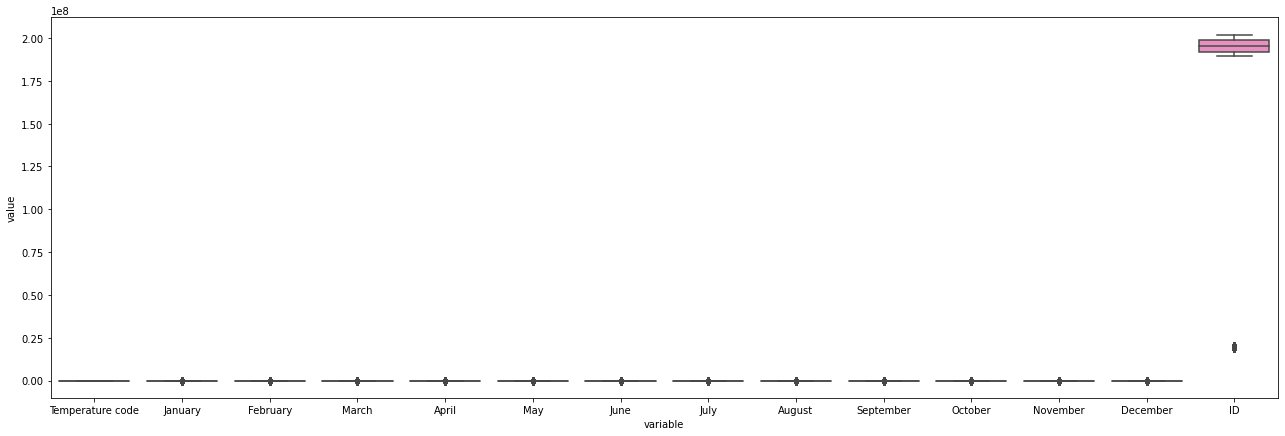

In [148]:
#boxplot
plt.figure(figsize=(22,7))
sns.boxplot(x="variable", y="value", data=pandas.melt(df_temperature.drop(columns=['FIPS', "Year"])))
plt.show()

In [149]:
#we now take the average of the monthly temperature to get the yearly temperature, and add it as a column at the end of the dataset
df_temperature_values = df_temperature.drop(columns=['Year','FIPS', 'ID', 'Temperature code'])
df_temperature["Avg_over_the_year"]=df_temperature_values.mean(axis = 1, skipna = True)
df_temperature = df_temperature
df_temperature.head()

FIPS  Temperature code  Year  ...  December        ID  Avg_over_the_year
0  1001                 2  1895  ...      45.3  18951001          62.633333
1  1002                 2  1895  ...      45.3  18951002          62.633333
2  1003                 2  1895  ...      45.3  18951003          62.633333
3  1004                 2  1895  ...      45.3  18951004          62.633333
4  1005                 2  1895  ...      45.3  18951005          62.633333

[5 rows x 17 columns]

In [150]:
df_temperature_per_year = df_temperature.groupby(["Year"]).Avg_over_the_year.mean().reset_index()
df_temperature_per_year.head()

Year  Avg_over_the_year
0  1895          52.438649
1  1896          54.010354
2  1897          53.662913
3  1898          53.603324
4  1899          53.096306

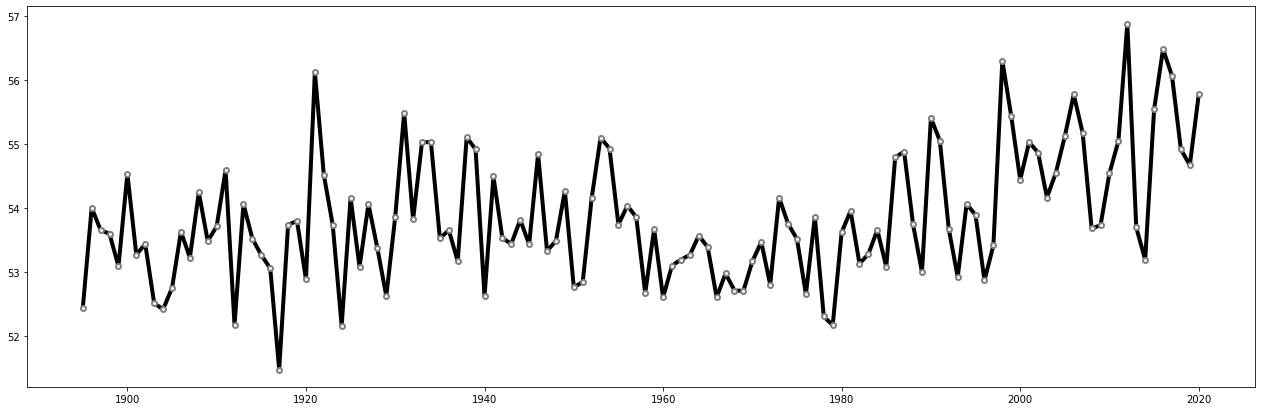

In [151]:
#Now plotting Yearly Average Temperature data in all of the US:

plt.figure(figsize=(22,7))
plt.plot(df_temperature_per_year.Year, df_temperature_per_year.Avg_over_the_year, '-ok',color='black',
         markersize=5, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

# KMEANS Algorithm

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
#from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [153]:
new_df= df.transpose()
new_df.head()


#choose part of the df to work with

0             1       ...     151766   151767
index                   0             1  ...      36804    36805
Year                 1939          1939  ...       1990     1990
State            COLORADO      COLORADO  ...    WYOMING  WYOMING
State ANSI              8             8  ...         56       56
Ag District  EAST CENTRAL  EAST CENTRAL  ...  SOUTHEAST     WEST

[5 rows x 151768 columns]

In [154]:
#Preparing data for normalization
from sklearn.preprocessing import MinMaxScaler

def NormalizeData(val):
	values = val.values
	values = values.reshape((len(values), 1))

	# train the normalization
	scaler = MinMaxScaler(feature_range=(0, 1))
	scaler = scaler.fit(values)
	print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
	print("------------------------------------")
	# normalize the data and print the first 5 rows
	normalized = scaler.transform(values)
	for i in range(5):
		print(normalized[i])
	print("------------------------------------")
	# inverse transform and print the first 5 rows
	inversed = scaler.inverse_transform(normalized)
	for i in range(5):
		print(inversed[i])
	return normalized

normalized_df = NormalizeData(df['Value'])

Min: 0.000000, Max: 127.800000
------------------------------------
[0.08998435]
[0.07824726]
[0.03912363]
[0.10954617]
[0.06259781]
------------------------------------
[11.5]
[10.]
[5.]
[14.]
[8.]


In [155]:
#standardize the data
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
def StandardizeData(val):
	#values = val.values
	values = val
	values = values.reshape((len(values), 1))

	# train the standardization
	scaler = StandardScaler()
	scaler = scaler.fit(values)
	print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
	# standardization the dataset and print the first 5 rows
	standardized = scaler.transform(values)
	for i in range(5):
		print(standardized[i])
	# inverse transform and print the first 5 rows
	inversed = scaler.inverse_transform(standardized)
	for i in range(5):
		print(inversed[i])
	return standardized

standardized_df = StandardizeData(normalized_df)

Mean: 0.244744, StandardDeviation: 0.122585
[-1.26246788]
[-1.35821457]
[-1.67737023]
[-1.10289005]
[-1.48587684]
[0.08998435]
[0.07824726]
[0.03912363]
[0.10954617]
[0.06259781]


We will be working with the dataframe to which we added soil info. 

We will further add to it temperature and precipitation data (after selecting the counties with valid soil info). 

In [156]:
df.head()

index  Year     State  State ANSI  ...  kffactor       spH      slope   tfactor
0      0  1939  COLORADO           8  ...  0.312201  7.957254  80.425008  4.708308
1      1  1939  COLORADO           8  ...  0.300439  7.733126  88.547444  4.145389
2      2  1939  COLORADO           8  ...  0.400709  7.961142  70.745841  4.881807
3      3  1939  COLORADO           8  ...       NaN       NaN        NaN       NaN
4      4  1939  COLORADO           8  ...  0.319463  7.175293  62.072581  3.830624

[5 rows x 22 columns]

We take a subset of this dataframe for which we have known values for the soil. 

In [157]:
df_kmeans = df[df['whc'].notna()]


#merging FIPS and year to have a unique identifier for every row
#new column ID is a unique identifier for every row
df_kmeans["ID"] = df_kmeans["Year"].astype(str) + df_kmeans["FIPS"].astype(str)
df_kmeans["ID"] = df_kmeans["ID"].astype(float).astype(int)

df_kmeans.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


index  Year     State  State ANSI  ...       spH      slope   tfactor        ID
0      0  1939  COLORADO           8  ...  7.957254  80.425008  4.708308  19398001
1      1  1939  COLORADO           8  ...  7.733126  88.547444  4.145389  19398005
2      2  1939  COLORADO           8  ...  7.961142  70.745841  4.881807  19398017
4      4  1939  COLORADO           8  ...  7.175293  62.072581  3.830624  19398041
5      5  1939  COLORADO           8  ...  7.241436  54.811352  3.800091  19398039

[5 rows x 23 columns]

In [158]:
#make sure there are no more soil NaN values 
df_kmeans['whc'].isna().sum()

0

In [159]:
unique_soil_counties= df_kmeans['County'].unique()
print("The unique counties present are:", unique_soil_counties)
print("There are", len(unique_soil_counties), "present in the dataset contrart to the", len(df['County'].unique()), "present in the original data. So, 109 counties are not represented anymore.")

The unique counties present are: ['ADAMS' 'ARAPAHOE' 'CHEYENNE' ... 'AVERY' 'TRINITY' 'ZAPATA']
There are 1568 present in the dataset contrart to the 1677 present in the original data. So, 109 counties are not represented anymore.


Merging Temperature and Precipitation together

In [160]:
# df3 = pd.merge(df1, df2)
# df3
#preparing to merge
#df_precipitation.drop(columns=['January', 'February', 'March','April','May','June','July','August','September','October','November','December'])
df_precipitation_subset = df_precipitation[['ID', 'Sum_over_the_year']]
df_precipitation_subset = df_precipitation_subset.rename(columns={'Sum_over_the_year': 'Yearly Precipitation'})
df_precipitation_subset.head()
print(df_temperature.head())


df_temperature_subset = df_temperature[['ID', 'Avg_over_the_year']]
df_temperature_subset = df_temperature_subset.rename(columns={'Avg_over_the_year': 'Yearly Average Temperature'})
print(df_temperature_subset.head())
df_precipitation_temperature = pandas.merge(df_precipitation_subset, df_temperature_subset, on='ID')
df_precipitation_temperature.head()

   FIPS  Temperature code  Year  ...  December        ID  Avg_over_the_year
0  1001                 2  1895  ...      45.3  18951001          62.633333
1  1002                 2  1895  ...      45.3  18951002          62.633333
2  1003                 2  1895  ...      45.3  18951003          62.633333
3  1004                 2  1895  ...      45.3  18951004          62.633333
4  1005                 2  1895  ...      45.3  18951005          62.633333

[5 rows x 17 columns]
         ID  Yearly Average Temperature
0  18951001                   62.633333
1  18951002                   62.633333
2  18951003                   62.633333
3  18951004                   62.633333
4  18951005                   62.633333


ID  Yearly Precipitation  Yearly Average Temperature
0  18951001                 46.38                   62.633333
1  19761001                 55.81                   61.375000
2  19771001                 48.30                   63.608333
3  19781001                 48.44                   62.775000
4  19791001                 68.03                   62.216667

## Adding Temperature and Precipitation Data

In [161]:
df_kmeans_TP = pandas.merge(df_kmeans, df_precipitation_temperature, on='ID')
df_kmeans_TP.head()


index  Year  ... Yearly Precipitation  Yearly Average Temperature
0      0  1939  ...                 7.34                   49.666667
1      1  1939  ...                 8.20                   49.291667
2      2  1939  ...                11.81                   52.341667
3      4  1939  ...                10.12                   47.575000
4      5  1939  ...                11.05                   47.691667

[5 rows x 25 columns]

In [162]:
df_kmeans_TP_ = df_kmeans_TP.drop(columns=['index', 'State ANSI', 'Ag District', 'Ag District Code', 'County ANSI', 'Zip Code', 'Region','ID'])
df_kmeans_TP_.to_csv('/content/drive/My Drive/CMPS_276/data/CropYieldsCleaned.csv')
df_kmeans_TP_


Year     State  ... Yearly Precipitation  Yearly Average Temperature
0       1939  COLORADO  ...                 7.34                   49.666667
1       1939  COLORADO  ...                 8.20                   49.291667
2       1939  COLORADO  ...                11.81                   52.341667
3       1939  COLORADO  ...                10.12                   47.575000
4       1939  COLORADO  ...                11.05                   47.691667
...      ...       ...  ...                  ...                         ...
139720  1990   WYOMING  ...                11.36                   43.766667
139721  1990   WYOMING  ...                14.63                   44.583333
139722  1990   WYOMING  ...                17.11                   47.208333
139723  1990   WYOMING  ...                16.01                   46.416667
139724  1990   WYOMING  ...                18.00                   38.241667

[139725 rows x 17 columns]

In [163]:
df_kmeans_TP_ = df_kmeans_TP_.drop(columns=[ 'Year', 'State', 'County'])
df_kmeans_TP_.head()

Value    FIPS  ...  Yearly Precipitation  Yearly Average Temperature
0   11.5  8001.0  ...                  7.34                   49.666667
1   10.0  8005.0  ...                  8.20                   49.291667
2    5.0  8017.0  ...                 11.81                   52.341667
3    8.0  8041.0  ...                 10.12                   47.575000
4    9.0  8039.0  ...                 11.05                   47.691667

[5 rows x 14 columns]

## Dataset is now ready for K means

The next step is to scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.
Using the StandardScaler, we transform our dataframe into the following numpy arrays

In [164]:
X = StandardScaler().fit_transform(df_kmeans_TP_)
X

array([[-1.26183751, -1.61486181, -0.2995962 , ...,  0.72413829,
        -1.99603052, -0.40792099],
       [-1.36064993, -1.61457258, -0.80035655, ..., -0.34175825,
        -1.93503218, -0.45785479],
       [-1.69002463, -1.61370489,  1.00155665, ...,  1.05266218,
        -1.67898103, -0.05172655],
       ...,
       [-0.21442596,  1.85692227, -0.59692401, ...,  0.55273053,
        -1.30306106, -0.7352648 ],
       [-0.49110071,  1.85778996, -0.95962264, ...,  0.18654477,
        -1.38108218, -0.8406806 ],
       [-0.37252582,  1.85750073, -0.90753765, ..., -0.52972995,
        -1.23993487, -1.92923746]])

The number of clusters is already specified prior to running the model. We can choose a base level number for K and iterate to find the most optimum value. To evaluate which number of clusters is more optimum for our dataset, or find cluster fitness we use two scoring methods — Silhouette Coefficient and Calinski Harabasz Score. In reality, there are many different scoring methods depending on what metrics matter most in a model. Usually one method is chosen as the standard but for the purpose of this analysis I have used two.

*   The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b-a) / max(b-a). 
*   The Calinski Harabasz Score or Variance Ratio is the ratio between within-cluster dispersion and between-cluster dispersion

Let us implement the K-means algorithm using sci-kit learn.
n_clusters= 12

In [165]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

Calculating the silhouette coefficient...

In [166]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.16671589580349974

In [167]:
#CH score
metrics.calinski_harabasz_score(X, labels)

17038.61606966337

Let's try another value for the number of clusters, say n_clusters = 8

In [168]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X)
y_hat_8 = k_means_8.predict(X)

We calculate again the silhouette coef and CV scores

In [ ]:
labels_8 = k_means_8.labels_
metrics.silhouette_score(X, labels_8, metric = 'euclidean')

0.16790531016211122

In [ ]:
metrics.calinski_harabasz_score(X, labels_8)

19772.286395269486

for both score types, 8 custers yields a better value. But we'll need to do many iterations, each with a new cluster number to get the best number of clusters. We use the elbow method to find the optimal number of clusters.


*   An elbow plot shows at what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest.

we have two important quantities in this case: distortion and inertia


*   Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. 
*   Inertia is the sum of squared distances of samples to their closest cluster centre.




In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

We care about intra-cluster similarity in k-means and this is what the elbow plot will help us capture

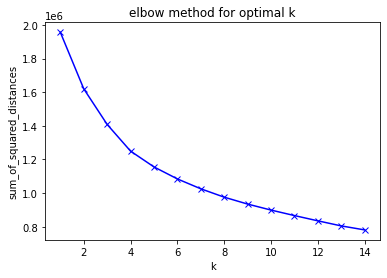

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

We can now notice that the drop in the sum of squared distance starts to slow down after k = 4. Therefore 4 is the optimal number of clusters for our analysis.

We can verify that by calculating again the silhouette coefficient and CH score for k = 4

In [ ]:
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
y_hat_4 = k_means_4.predict(X)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_4))

0.17582545268655483
26336.160940488255


### Visualizing the results

In [ ]:
df_kmeans_TP_C = df_kmeans_TP_
df_kmeans_TP_C['Clusters'] = y_hat_4
df_kmeans_TP_C.head()

Value    FIPS  ...  Yearly Average Temperature  Clusters
0   11.5  8001.0  ...                   49.666667         1
1   10.0  8005.0  ...                   49.291667         1
2    5.0  8017.0  ...                   52.341667         0
3    8.0  8041.0  ...                   47.575000         1
4    9.0  8039.0  ...                   47.691667         1

[5 rows x 15 columns]

In [ ]:
# get centroids
centroids = k_means_4.cluster_centers_

cen_x = [i[12] for i in centroids] 
cen_y = [i[13] for i in centroids]
print(centroids)
print("----------------------------------------------")
print(cen_x)
print("----------------------------------------------")
print(cen_y)
print("----------------------------------------------")

df_kmeans_TP_centroids = df_kmeans_TP_C
## add to df
df_kmeans_TP_centroids['cen_x'] = df_kmeans_TP_centroids.Clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df_kmeans_TP_centroids['cen_y'] = df_kmeans_TP_centroids.Clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FFA500']
df_kmeans_TP_centroids['c'] = df_kmeans_TP_centroids.Clusters.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
df_kmeans_TP_centroids.tail()

[[ 0.20746377 -0.52120896  1.1006985  -0.93794165  1.18781244  0.03976365
  -0.10189338  1.2297294   1.08818865  0.04388445 -0.01048967  0.42913615
   0.07343826  0.12621917]
 [-0.08623422  0.14098659 -0.18226101  0.44341852 -0.33975598 -0.38898643
   0.37027126 -0.06485203 -0.15409181  0.94923022  0.27202885 -0.04234432
  -0.91603298 -0.83470443]
 [-0.08909472  0.41385975 -0.47967423 -0.4614178   0.15736913  0.73221467
  -0.23169289 -0.27937502  0.0512547  -0.47373742 -0.25312171 -0.59984744
   0.53115557  0.37626081]
 [ 0.01634204 -0.26621833 -0.42689958  1.50657083 -1.50121353 -0.74270927
  -0.09966397 -1.24232414 -1.49538182 -0.96367471 -0.01177888  0.58254335
   0.60598923  0.66986641]]
----------------------------------------------
[0.07343825780094103, -0.916032984333003, 0.531155573783368, 0.6059892340823022]
----------------------------------------------
[0.1262191693432625, -0.8347044324656965, 0.3762608096167506, 0.6698664079106093]
------------------------------------------

Value     FIPS        whc  ...     cen_x     cen_y        c
139720   20.0  56025.0  23.369125  ... -0.916033 -0.834704  #81DF20
139721   23.6  56009.0  21.671311  ... -0.916033 -0.834704  #81DF20
139722   27.4  56015.0  20.781018  ... -0.916033 -0.834704  #81DF20
139723   23.2  56027.0  18.761774  ... -0.916033 -0.834704  #81DF20
139724   25.0  56023.0  19.051746  ... -0.916033 -0.834704  #81DF20

[5 rows x 18 columns]

Then we can pass the fields we used to create the cluster to Matplotlib’s scatter and use the ‘c’ column we created to paint the points in our chart according to their cluster.

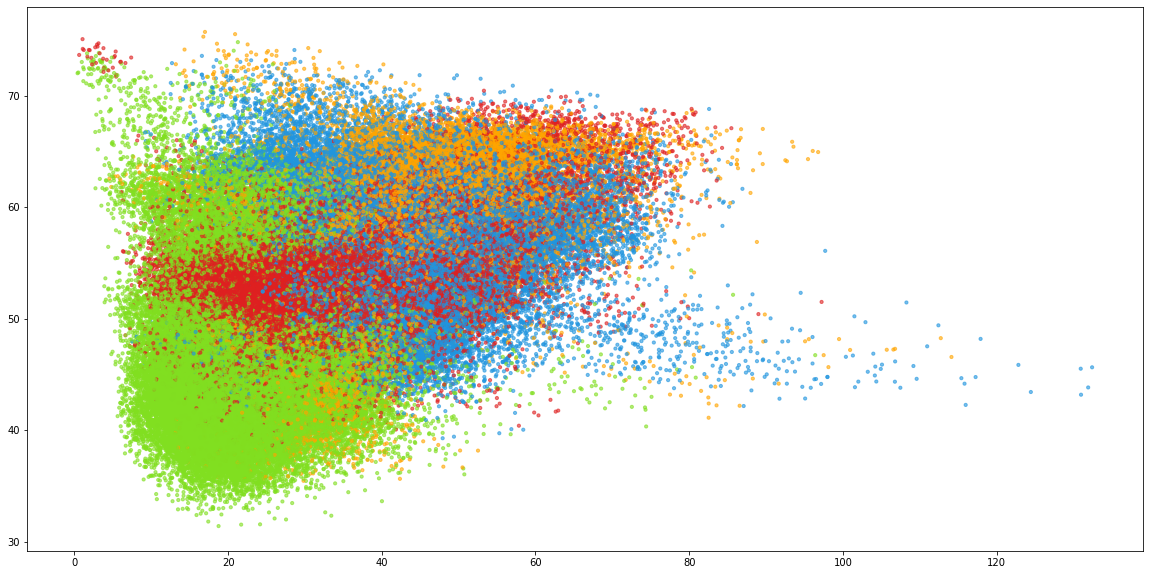

In [ ]:
import matplotlib.pyplot as plt
#df_kmeans_TP_centroids.loc[df_kmeans_TP_centroids['c'] == '0']
fig = plt.figure(figsize=(20,10))
plt.scatter(df_kmeans_TP_centroids['Yearly Precipitation'], df_kmeans_TP_centroids['Yearly Average Temperature'], c=df_kmeans_TP_centroids.c, alpha = 0.6, s=10)


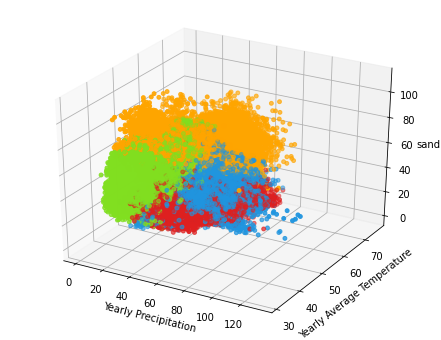

In [ ]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
#plt.scatter(df_kmeans_TP_centroids['Yearly Precipitation'], df_kmeans_TP_centroids['Yearly Average Temperature'], c=df_kmeans_TP_centroids.c, alpha = 0.6, s=10)
ax.scatter(df_kmeans_TP_centroids['Yearly Precipitation'], df_kmeans_TP_centroids['Yearly Average Temperature'],
           df_kmeans_TP_centroids['sand'], c=df_kmeans_TP_centroids.c, s=15)
ax.set_xlabel('Yearly Precipitation')
ax.set_ylabel('Yearly Average Temperature')
ax.set_zlabel('sand')
plt.show()

In [ ]:
#Training K means on temperature and precipitation only

X = StandardScaler().fit_transform(df_kmeans_TP_[['Yearly Precipitation', 'Yearly Average Temperature']])

#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)


plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

def Kmeansn(nclusters):
  k_means_n = KMeans(n_clusters=nclusters)
  model = k_means_n.fit(X)
  y_hat_n = k_means_n.predict(X)
  labels_n = k_means_n.labels_
  print(metrics.silhouette_score(X, labels_n, metric = 'euclidean'))
  print(metrics.calinski_harabasz_score(X, labels_n))
  return (k_means_n, model, y_hat_n, labels_n)

res = Kmeansn(4)
yhat_n = res[2]


In [ ]:
df_kmeans_TP_TP = df_kmeans_TP_[['Yearly Precipitation', 'Yearly Average Temperature']]
df_kmeans_TP_TP['Clusters'] = yhat_n
df_kmeans_TP_TP.head()

# get centroids
centroids = res[0].cluster_centers_

cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df_kmeans_TP_centroids = df_kmeans_TP_C
## add to df
df_kmeans_TP_TP['cen_x'] = df_kmeans_TP_TP.Clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df_kmeans_TP_TP['cen_y'] = df_kmeans_TP_TP.Clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#FFA500']
df_kmeans_TP_TP['c'] = df_kmeans_TP_TP.Clusters.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
df_kmeans_TP_TP.tail()

import matplotlib.pyplot as plt
#df_kmeans_TP_centroids.loc[df_kmeans_TP_centroids['c'] == '0']
fig = plt.figure(figsize=(20,10))
plt.scatter(df_kmeans_TP_TP['Yearly Precipitation'], df_kmeans_TP_TP['Yearly Average Temperature'], c=df_kmeans_TP_TP.c, alpha = 0.6, s=10)
